In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [32]:
# Suppress scientific notation in pandas
pd.options.display.float_format = '{:.2f}'.format

# Increase the maximum number of rows and columns displayed by pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 150)

In [33]:
# Load the dataset from a CSV file
file_path = 'loan.csv'
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataset
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [34]:
# Display the shape of the dataset
print("Data Shape:", data.shape)

Data Shape: (39717, 111)


## Data Cleaning

In [35]:
# Calculate and display the percentage of null or missing values in each column
null_perc = round(100 * (data.isnull().sum() / len(data.index)), 2)
print("Columns with missing values:\n", null_perc[null_perc > 0])

Columns with missing values:
 emp_title                          6.19
emp_length                         2.71
desc                              32.59
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12

In [36]:
# Remove columns with more than 30% missing values
data.drop(null_perc[null_perc > 30].index, axis=1, inplace=True)

In [37]:
# Display the number of unique values in each column and drop columns with only one unique value
# single value columns will not add any variance in our comparison of completed and charged off loans
unique_counts = data.nunique().sort_values()
print("Columns with unique values:\n", unique_counts.head(15))

Columns with unique values:
 tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64


In [38]:
# Drop columns with only one unique value
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',
           'application_type', 'policy_code', 'collections_12_mths_ex_med', 
           'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [39]:
# Drop columns with high number of unique values (excluding those needed)
high_unique_cols = data.nunique().sort_values(ascending=False).head(12)
print("High unique value columns:\n", high_unique_cols)

High unique value columns:
 id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64


In [40]:
# Drop columns with a high number of unique values that are not necessary for analysis
data.drop(['emp_title', 'title'], axis=1, inplace=True)

In [41]:
# Drop columns with unique values or redundant information
data.drop(['member_id', 'url'], axis=1, inplace=True)

In [42]:
# Drop columns that are not relevant for loan applications
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 
           'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 
           'last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [43]:
# Drop rows with missing values in specific columns
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [44]:
# Remove rows with 'Current' loan status as we only need 'Fully Paid' and 'Charged Off'
data = data[data.loan_status != 'Current']

In [45]:
# Remove leading/trailing spaces in 'term' column and display unique values
data['term'] = data.term.str.strip()
print("Unique values in 'term':\n", data.term.unique())

Unique values in 'term':
 ['36 months' '60 months']


In [46]:
# Display the shape of the dataset after cleaning
print("Data Shape after cleaning:", data.shape)

Data Shape after cleaning: (36800, 31)


In [47]:
# Convert data types
# Convert 'int_rate' and 'revol_util' to float by removing '%' symbol
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)
# Convert 'issue_d' and 'earliest_cr_line' columns to datetime
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d'] = data['issue_d'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2020 else x)

In [48]:
# Display the data types after conversion
print("Data types after conversion:\n", data.dtypes)

Data types after conversion:
 id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        i

In [49]:
# Create new columns from datetime columns
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [50]:
# Create a new column for approved loan amount ratio
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv * 100 / data.loan_amnt, 2)

In [51]:
# Display the first few rows to check the new columns
data.head()

# Display the final data types for analysis
print("Final data types:\n", data.dtypes)

Final data types:
 id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                           

## Univariate Analysis

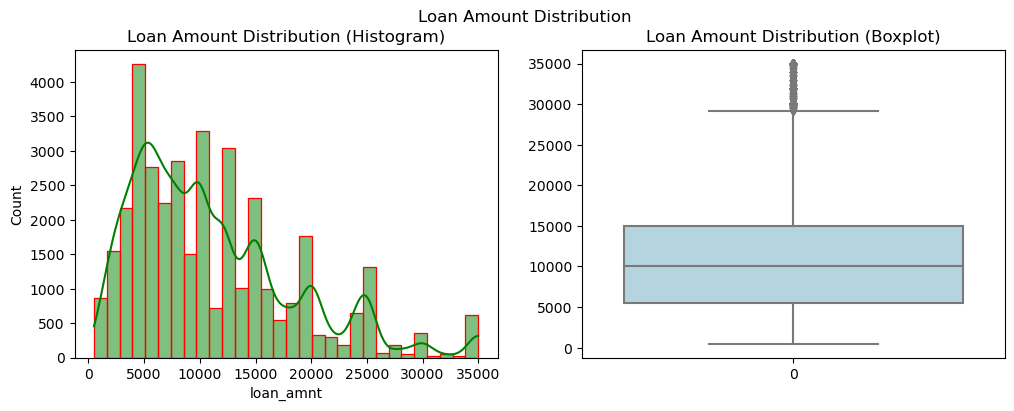

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64


In [52]:
## Loan Amount
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.loan_amnt, kde=True, color='green', bins=30, edgecolor='red')
plt.title('Loan Amount Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.loan_amnt, color='lightblue')
plt.title('Loan Amount Distribution (Boxplot)')

plt.suptitle('Loan Amount Distribution')
plt.show()

print(data.loan_amnt.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


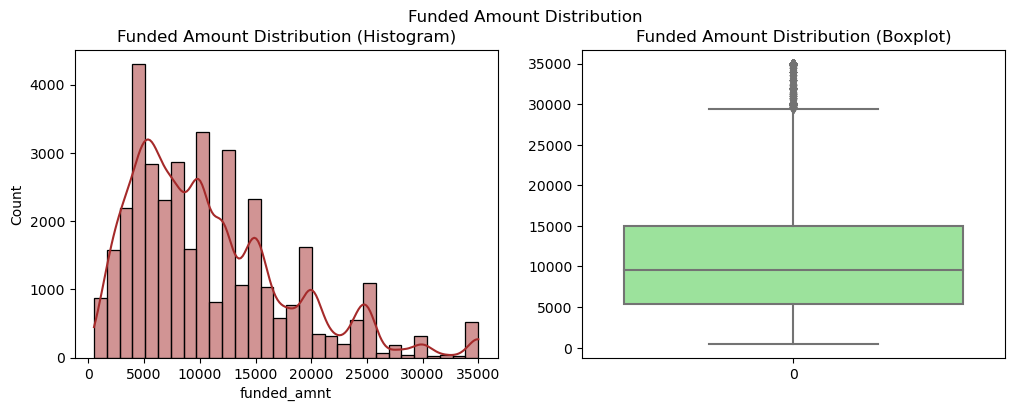

count   36800.00
mean    10880.79
std      7109.16
min       500.00
5%       2400.00
10%      3200.00
25%      5400.00
50%      9600.00
75%     15000.00
90%     20375.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64


In [53]:
## Funded Amount
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.funded_amnt, kde=True, color='brown', bins=30, edgecolor='black')
plt.title('Funded Amount Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.funded_amnt, color='lightgreen')
plt.title('Funded Amount Distribution (Boxplot)')

plt.suptitle('Funded Amount Distribution')
plt.show()

print(data.funded_amnt.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

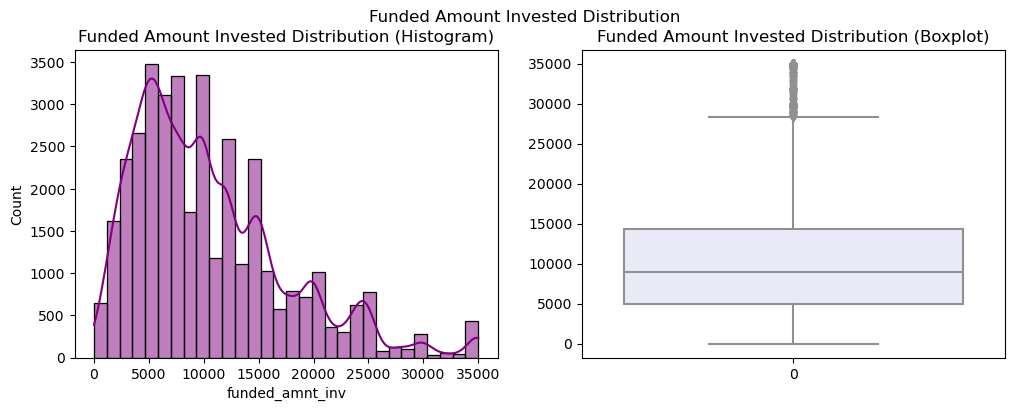

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64


In [54]:
## Funded Amount Invested
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.funded_amnt_inv, kde=True, color='purple', bins=30, edgecolor='black')
plt.title('Funded Amount Invested Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.funded_amnt_inv, color='lavender')
plt.title('Funded Amount Invested Distribution (Boxplot)')

plt.suptitle('Funded Amount Invested Distribution')
plt.show()

print(data.funded_amnt_inv.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

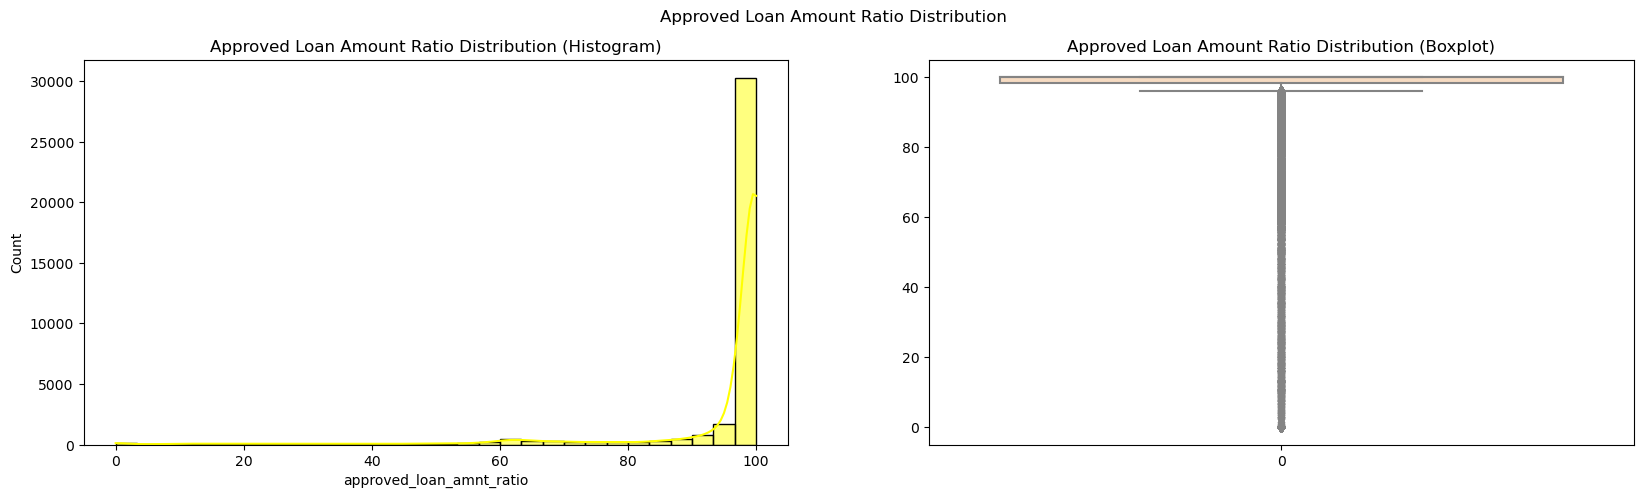

In [55]:
## Approved Loan Amount Ratio
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(data.approved_loan_amnt_ratio, kde=True, color='yellow', bins=30, edgecolor='black')
plt.title('Approved Loan Amount Ratio Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.approved_loan_amnt_ratio, color='peachpuff')
plt.title('Approved Loan Amount Ratio Distribution (Boxplot)')

plt.suptitle('Approved Loan Amount Ratio Distribution')
plt.show()

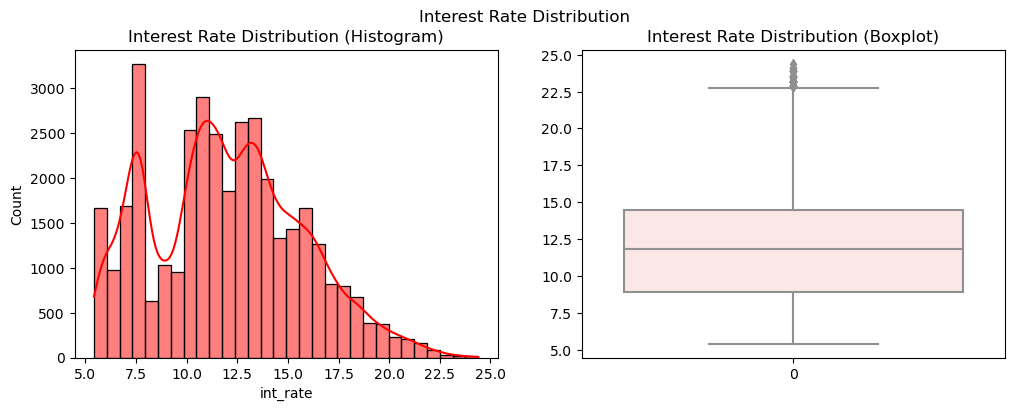

count   36800.00
mean       11.98
std         3.70
min         5.42
5%          6.17
10%         7.14
25%         8.94
50%        11.83
75%        14.46
90%        16.82
95%        18.39
99%        20.99
max        24.40
Name: int_rate, dtype: float64


In [56]:
## Interest Rate
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.int_rate, kde=True, color='red', bins=30, edgecolor='black')
plt.title('Interest Rate Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.int_rate, color='mistyrose')
plt.title('Interest Rate Distribution (Boxplot)')

plt.suptitle('Interest Rate Distribution')
plt.show()

print(data.int_rate.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

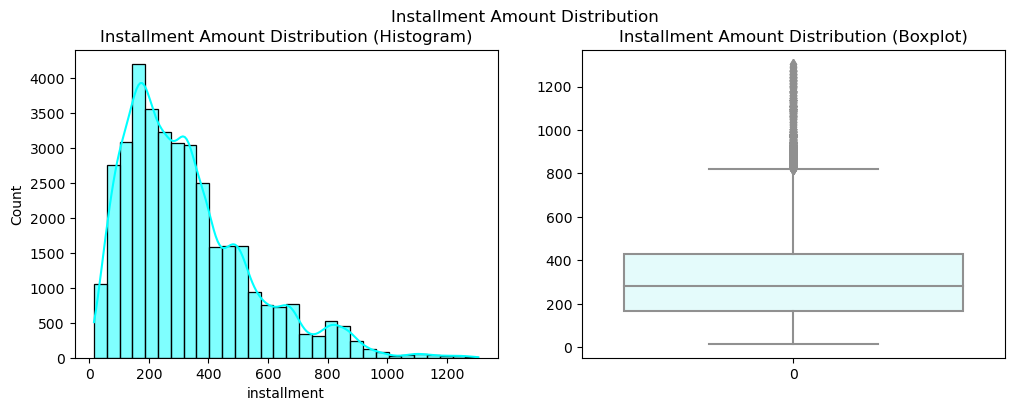

count   36800.00
mean      324.91
std       208.89
min        16.08
5%         73.05
10%       100.63
25%       167.73
50%       280.11
75%       429.37
90%       622.97
95%       763.56
99%       933.05
max      1305.19
Name: installment, dtype: float64


In [57]:
## Installment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.installment, kde=True, color='cyan', bins=30, edgecolor='black')
plt.title('Installment Amount Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.installment, color='lightcyan')
plt.title('Installment Amount Distribution (Boxplot)')

plt.suptitle('Installment Amount Distribution')
plt.show()

print(data.installment.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

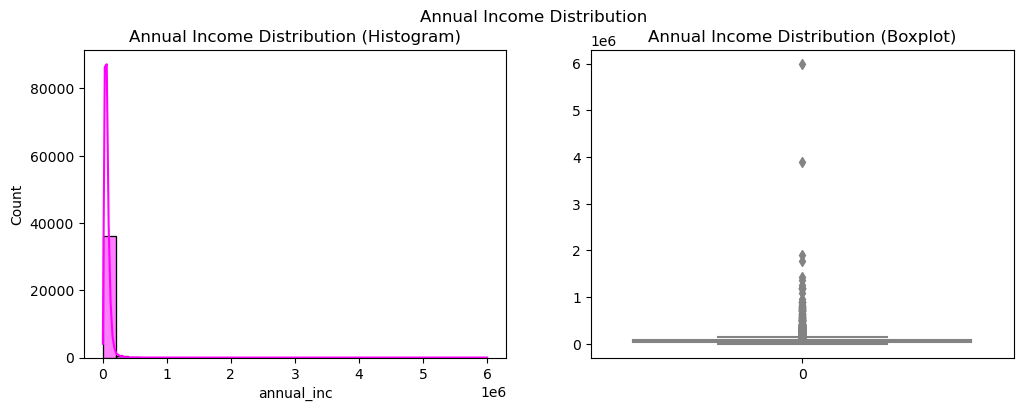

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
5%        24000.00
10%       30000.00
25%       41133.00
50%       60000.00
75%       83000.00
90%      116738.90
95%      142000.00
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64


In [58]:
## Annual Income
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.annual_inc, kde=True, color='magenta', bins=30, edgecolor='black')
plt.title('Annual Income Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.annual_inc, color='lightpink')
plt.title('Annual Income Distribution (Boxplot)')

plt.suptitle('Annual Income Distribution')
plt.show()

print(data.annual_inc.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

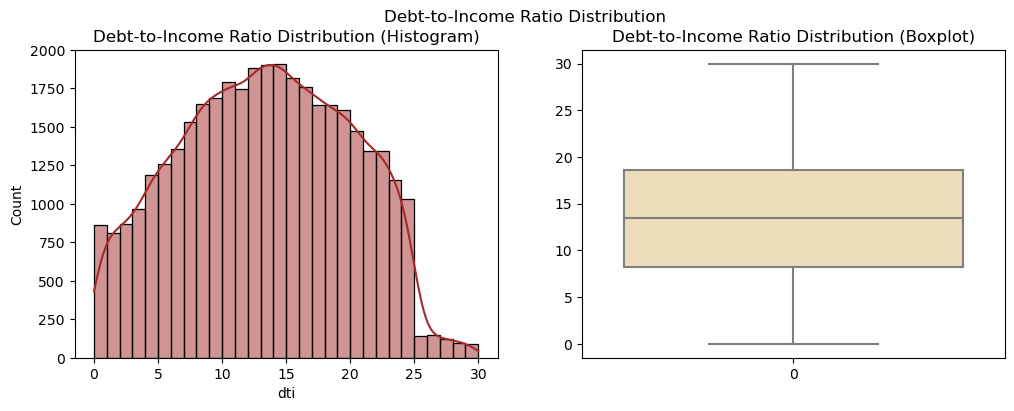

count   36800.00
mean       13.33
std         6.65
min         0.00
5%          2.19
10%         4.15
25%         8.22
50%        13.43
75%        18.59
90%        22.32
95%        23.81
99%        26.54
max        29.99
Name: dti, dtype: float64


In [59]:
## Debt-to-Income Ratio
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.dti, kde=True, color='brown', bins=30, edgecolor='black')
plt.title('Debt-to-Income Ratio Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data.dti, color='wheat')
plt.title('Debt-to-Income Ratio Distribution (Boxplot)')

plt.suptitle('Debt-to-Income Ratio Distribution')
plt.show()

print(data.dti.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

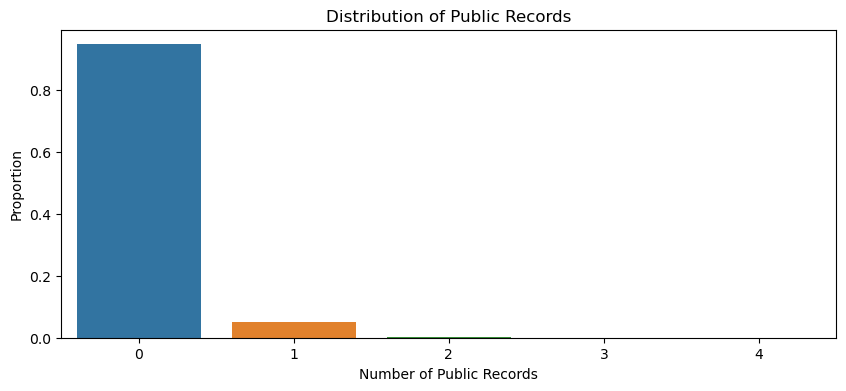

In [60]:
## Public Records
plt.figure(figsize=(10, 4))
sns.barplot(x=data.pub_rec.value_counts().index, y=data.pub_rec.value_counts(normalize=True))
plt.xlabel('Number of Public Records')
plt.ylabel('Proportion')
plt.title('Distribution of Public Records')
plt.show()

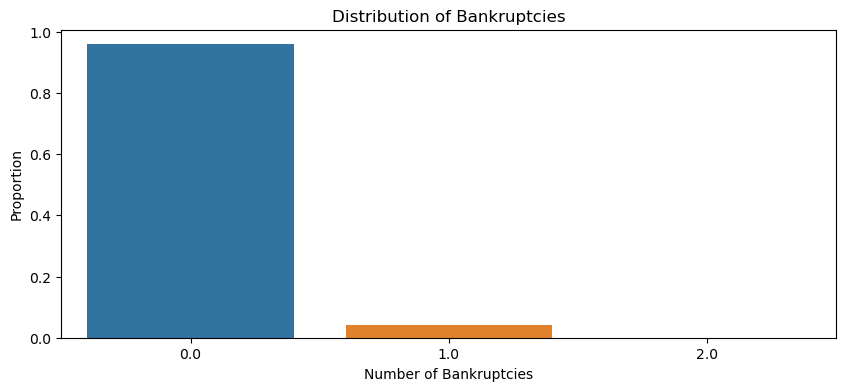

In [61]:
## Bankruptcies
plt.figure(figsize=(10, 4))
sns.barplot(x=data.pub_rec_bankruptcies.value_counts().index, y=data.pub_rec_bankruptcies.value_counts(normalize=True))
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Proportion')
plt.title('Distribution of Bankruptcies')
plt.show()

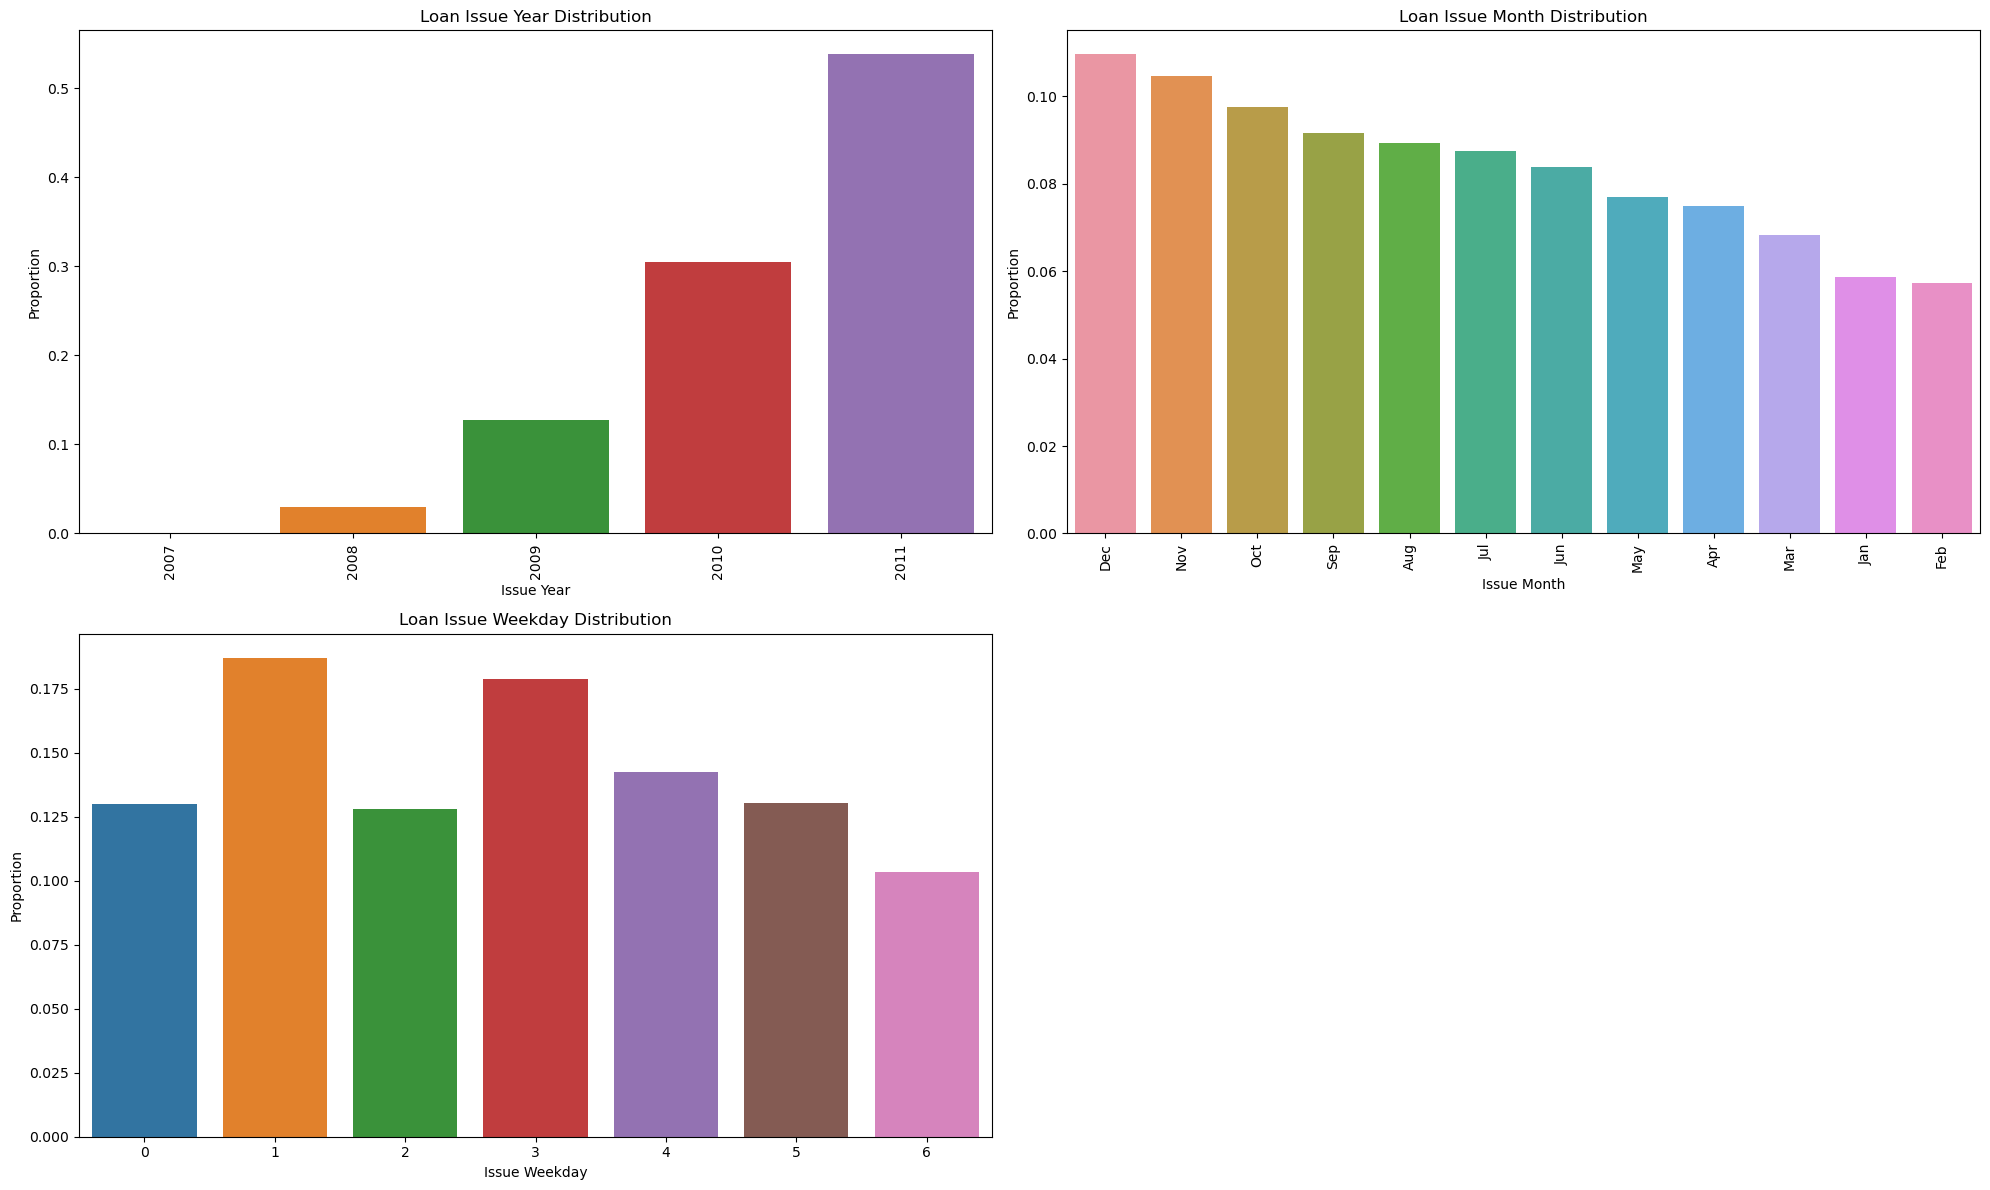

In [62]:
## Loan Issue Date
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=data.issue_d_year.value_counts().index, y=data.issue_d_year.value_counts(normalize=True))
plt.xlabel('Issue Year')
plt.ylabel('Proportion')
plt.title('Loan Issue Year Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.barplot(x=data.issue_d_month.value_counts().index, y=data.issue_d_month.value_counts(normalize=True))
plt.xlabel('Issue Month')
plt.ylabel('Proportion')
plt.title('Loan Issue Month Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.barplot(x=data.issue_d_weekday.value_counts().index, y=data.issue_d_weekday.value_counts(normalize=True))
plt.xlabel('Issue Weekday')
plt.ylabel('Proportion')
plt.title('Loan Issue Weekday Distribution')

plt.tight_layout()
plt.show()

### Observations
#### Lending Club (LC) has been increasing its loan issuance annually. Moreover, there is a surge in loan issuances during the final quarter of the year, specifically in October, November, and December.

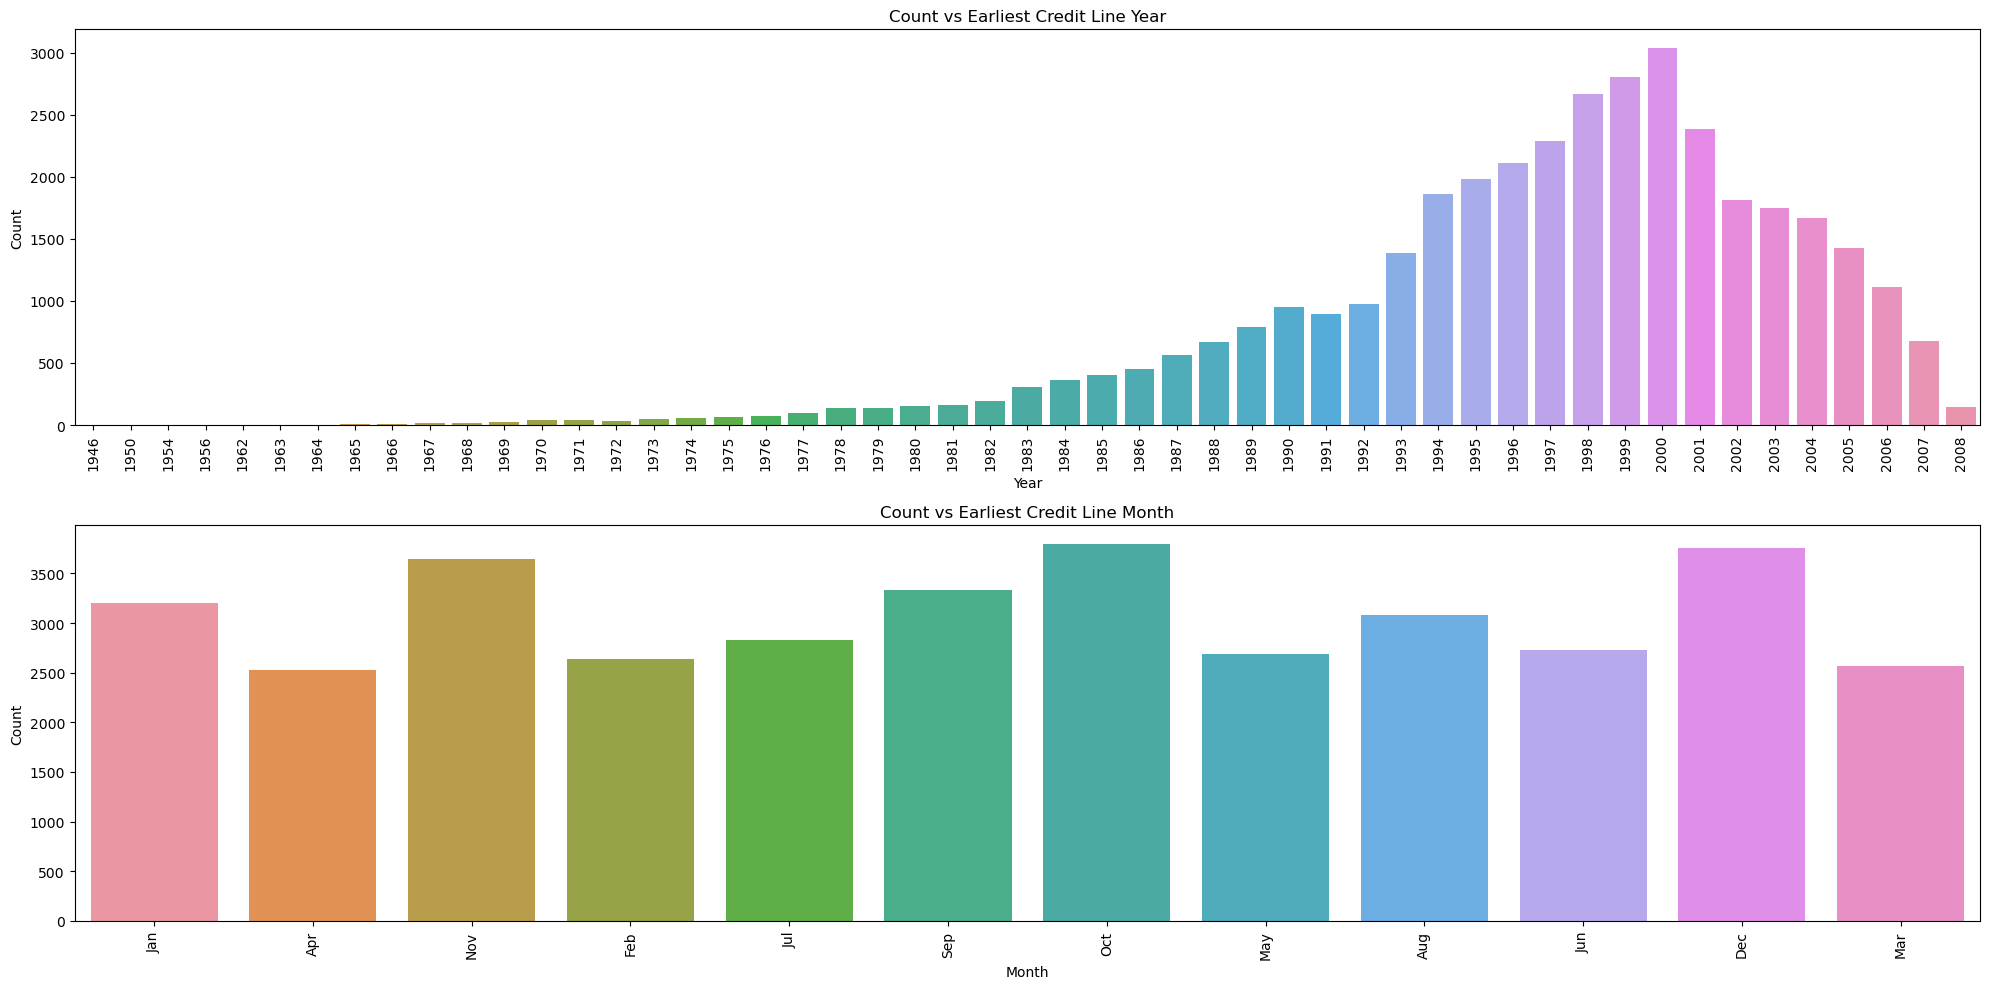

In [63]:
## Earliest Credit Line
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=data.earliest_cr_line_year)
plt.title('Count vs Earliest Credit Line Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=data.earliest_cr_line_month)
plt.title('Count vs Earliest Credit Line Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

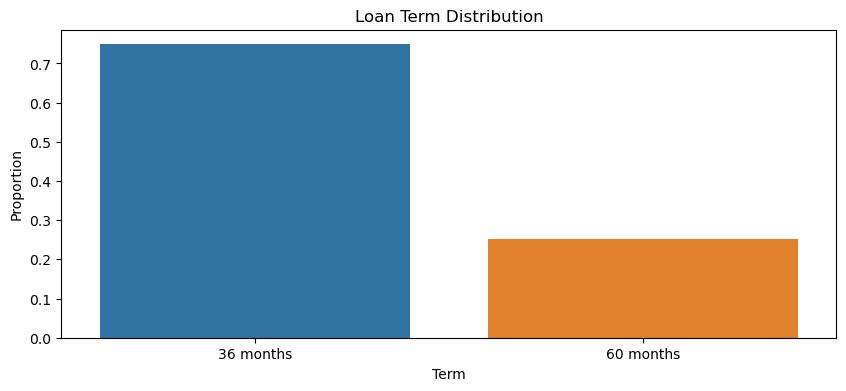

In [64]:
## Term
plt.figure(figsize=(10, 4))
sns.barplot(x=data.term.value_counts().index, y=data.term.value_counts(normalize=True))
plt.xlabel('Term')
plt.ylabel('Proportion')
plt.title('Loan Term Distribution')
plt.show()

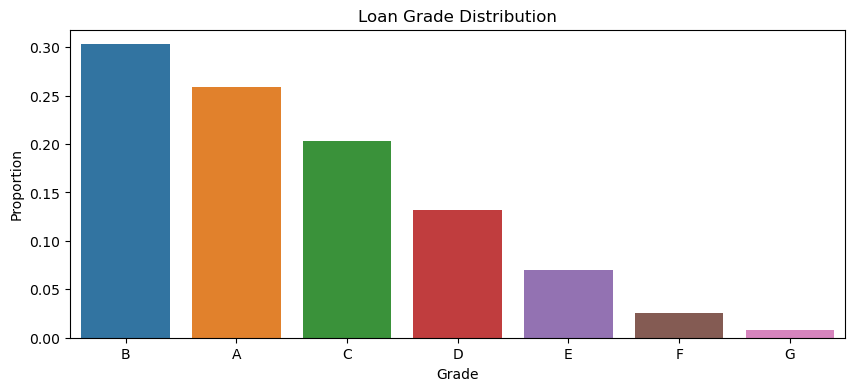

In [65]:
## Grade
plt.figure(figsize=(10, 4))
sns.barplot(x=data.grade.value_counts().index, y=data.grade.value_counts(normalize=True))
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.title('Loan Grade Distribution')
plt.show()

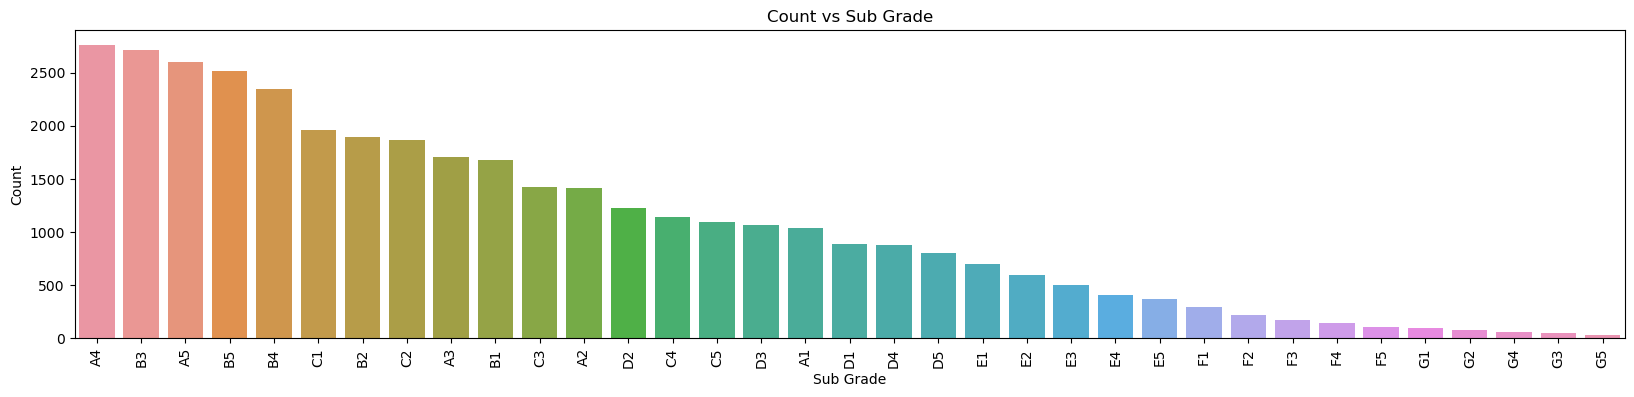

In [66]:
## Sub Grade
plt.figure(figsize=(20, 4))
sns.countplot(x=data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

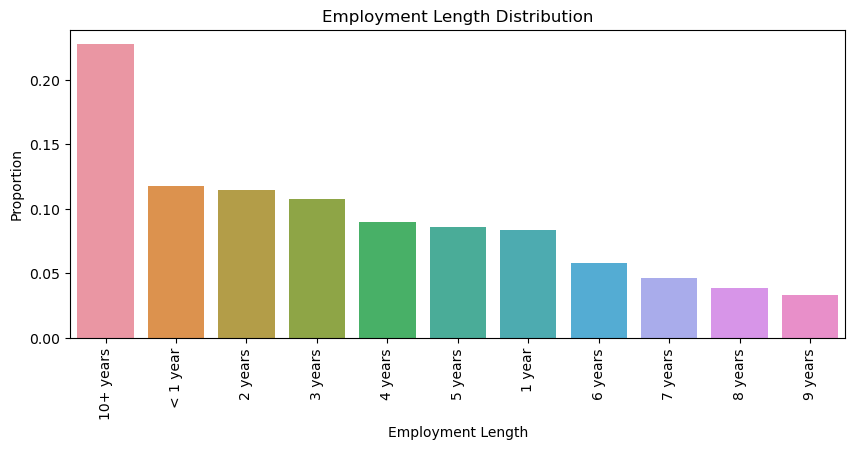

In [67]:
## Employment Length
plt.figure(figsize=(10, 4))
sns.barplot(x=data.emp_length.value_counts().index, y=data.emp_length.value_counts(normalize=True))
plt.xlabel('Employment Length')
plt.ylabel('Proportion')
plt.title('Employment Length Distribution')
plt.xticks(rotation=90)
plt.show()

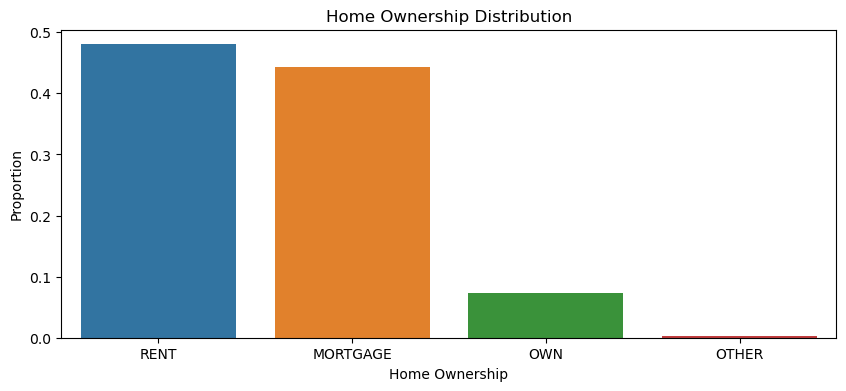

In [68]:
## Home Ownership
plt.figure(figsize=(10, 4))
sns.barplot(x=data.home_ownership.value_counts().index, y=data.home_ownership.value_counts(normalize=True))
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

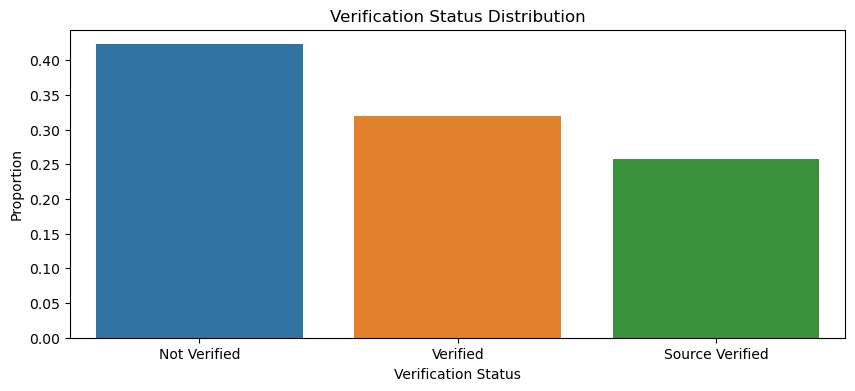

In [69]:
## Verification Status
plt.figure(figsize=(10,4))
sns.barplot(x=data.verification_status.value_counts().index, y=data.verification_status.value_counts(normalize=True))
plt.xlabel('Verification Status')
plt.ylabel('Proportion')
plt.title('Verification Status Distribution')
plt.show()

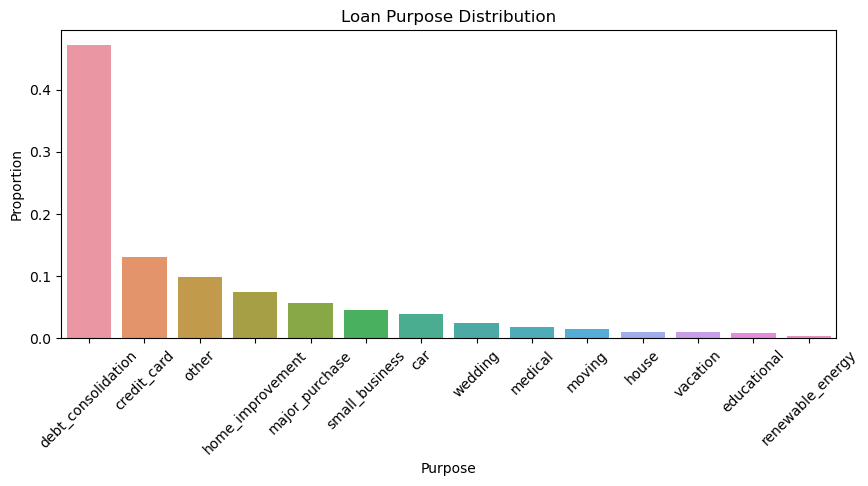

In [70]:
## Purpose
plt.figure(figsize=(10, 4))
sns.barplot(x=data.purpose.value_counts().index, y=data.purpose.value_counts(normalize=True))
plt.xlabel('Purpose')
plt.ylabel('Proportion')
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)
plt.show()

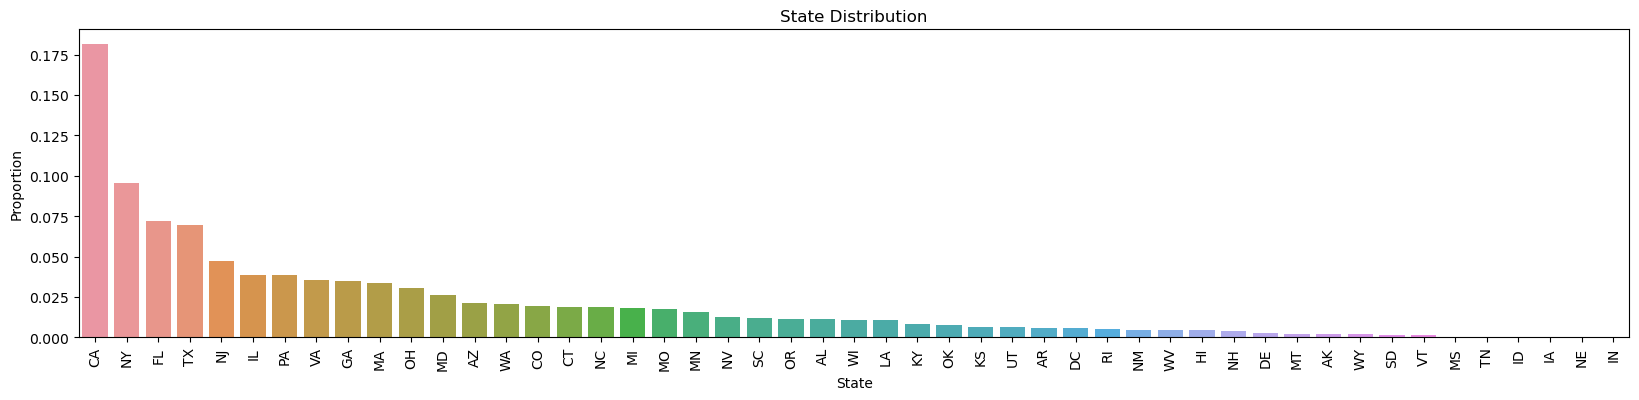

In [71]:
## State
plt.figure(figsize=(20, 4))
sns.barplot(x=data.addr_state.value_counts().index, y=data.addr_state.value_counts(normalize=True))
plt.xlabel('State')
plt.ylabel('Proportion')
plt.title('State Distribution')
plt.xticks(rotation=90)
plt.show()

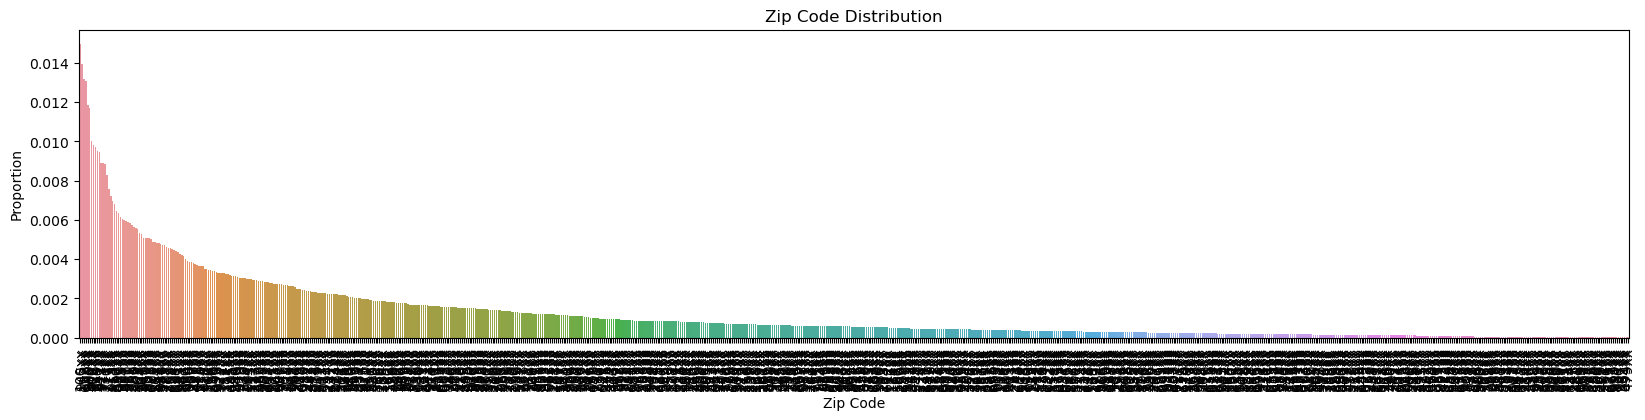

In [72]:
## Zip Code
plt.figure(figsize=(20, 4))
sns.barplot(x=data.zip_code.value_counts().index, y=data.zip_code.value_counts(normalize=True))
plt.xlabel('Zip Code')
plt.ylabel('Proportion')
plt.title('Zip Code Distribution')
plt.xticks(rotation=90)
plt.show()

## Segmented Univariate Analysis

### Loan Amount

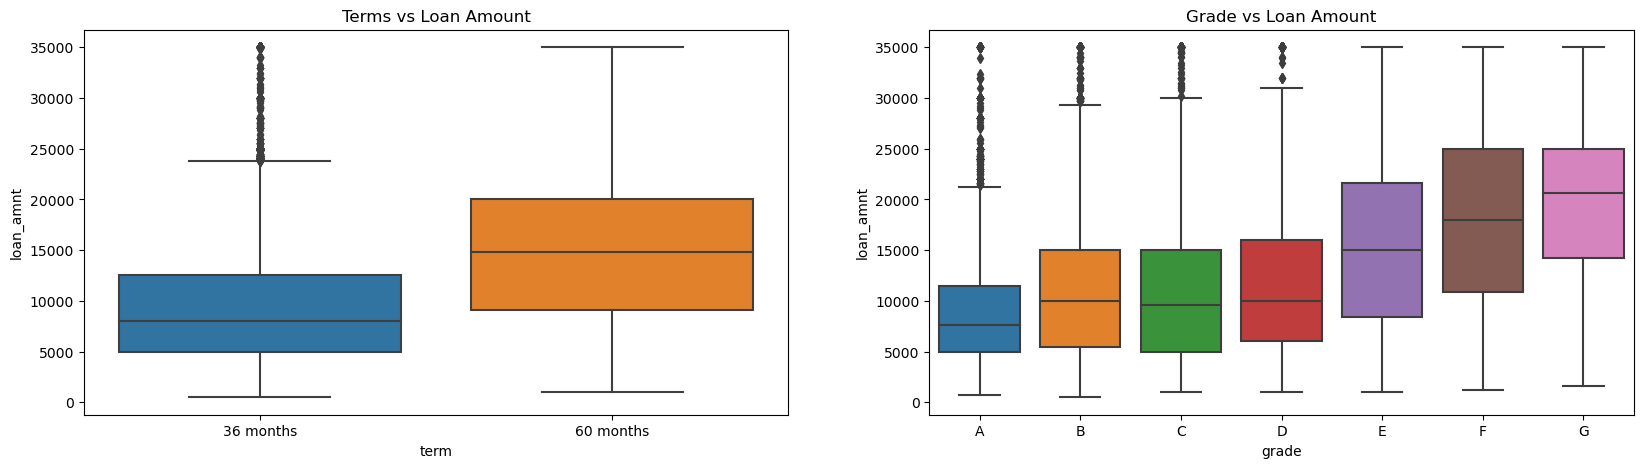

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)
plt.show()

### Observations: 
#### Larger loan amounts are linked to longer repayment terms, like 60 months. Borrowers with grades 'G' and 'E' have secured the highest loan amounts, and as credit grades decline, the loan amounts generally rise.

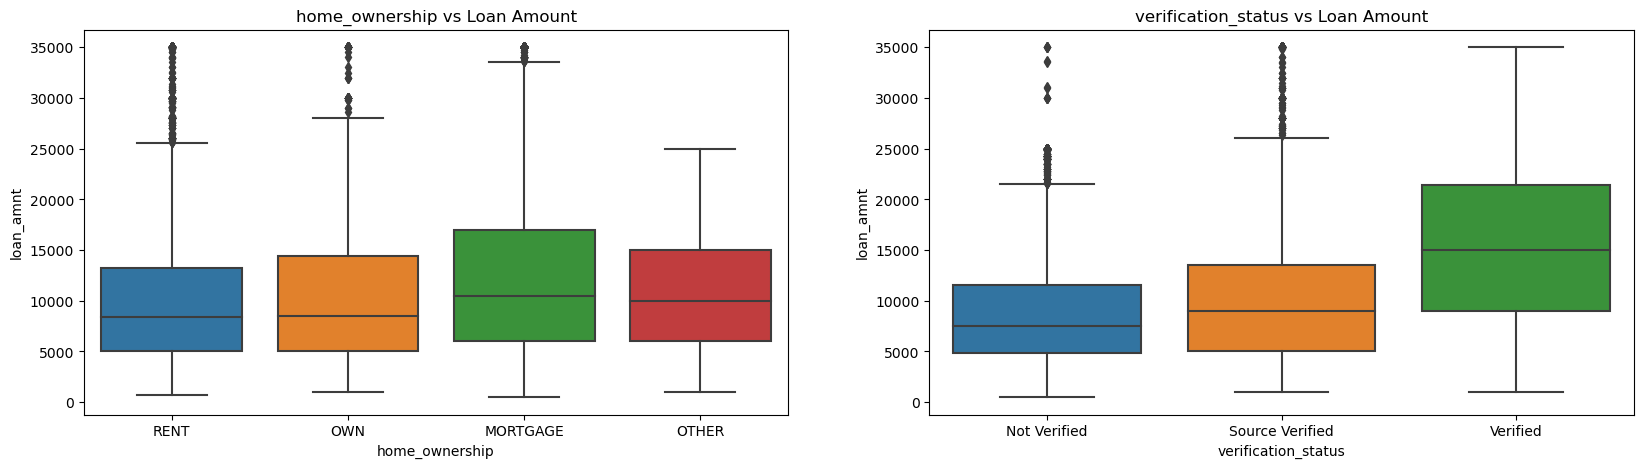

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)
plt.show()

### Observations:
#### More borrowers have mortgages, and those with mortgages tend to take out higher loan amounts on average. Also, most borrowers with loans over 9,000 have been verified.

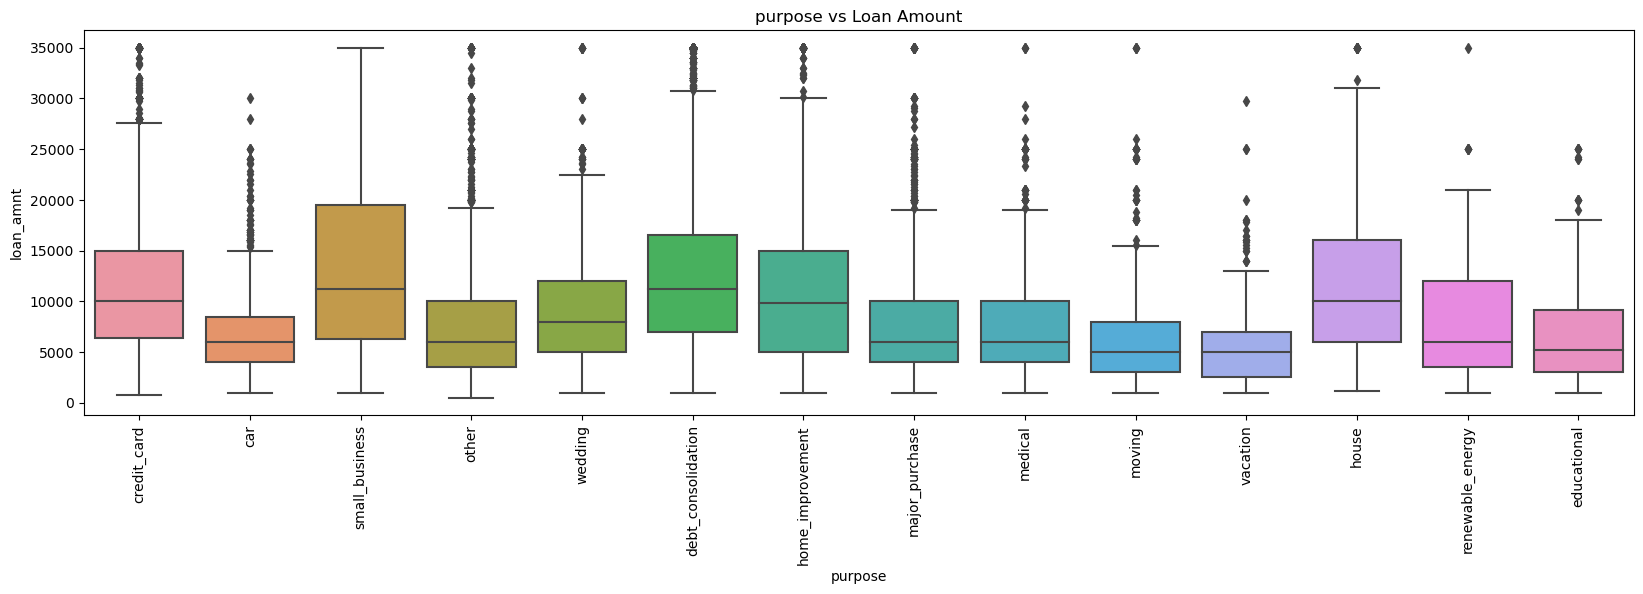

In [85]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

### Observations:
#### The highest loan amounts are for small business purposes, followed by debt consolidation.

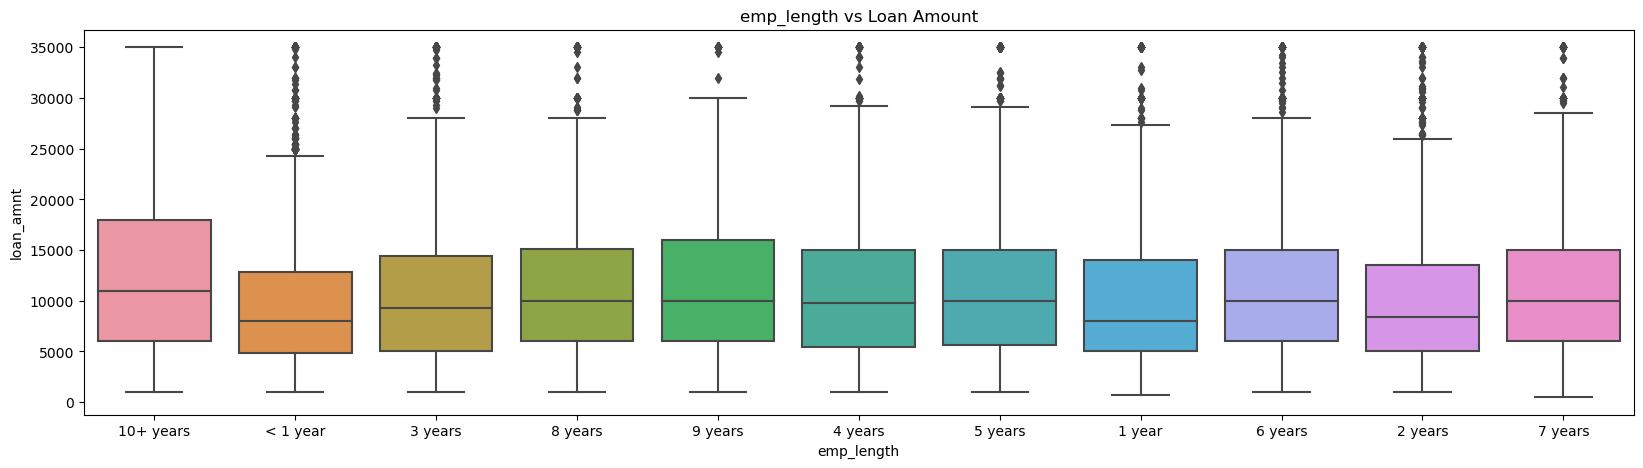

In [86]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')
plt.show()

### Observations:
#### Most borrowers have a credit history of over 10 years, while the least number have a credit history of less than 1 year.

### Funded amount

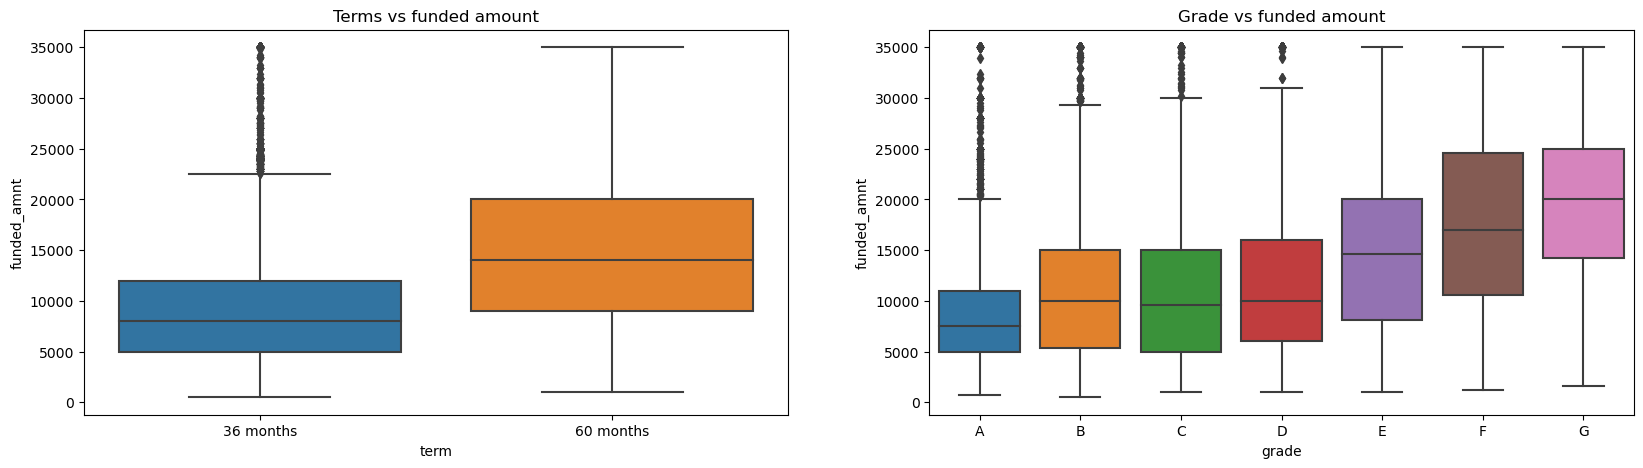

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)
plt.show()

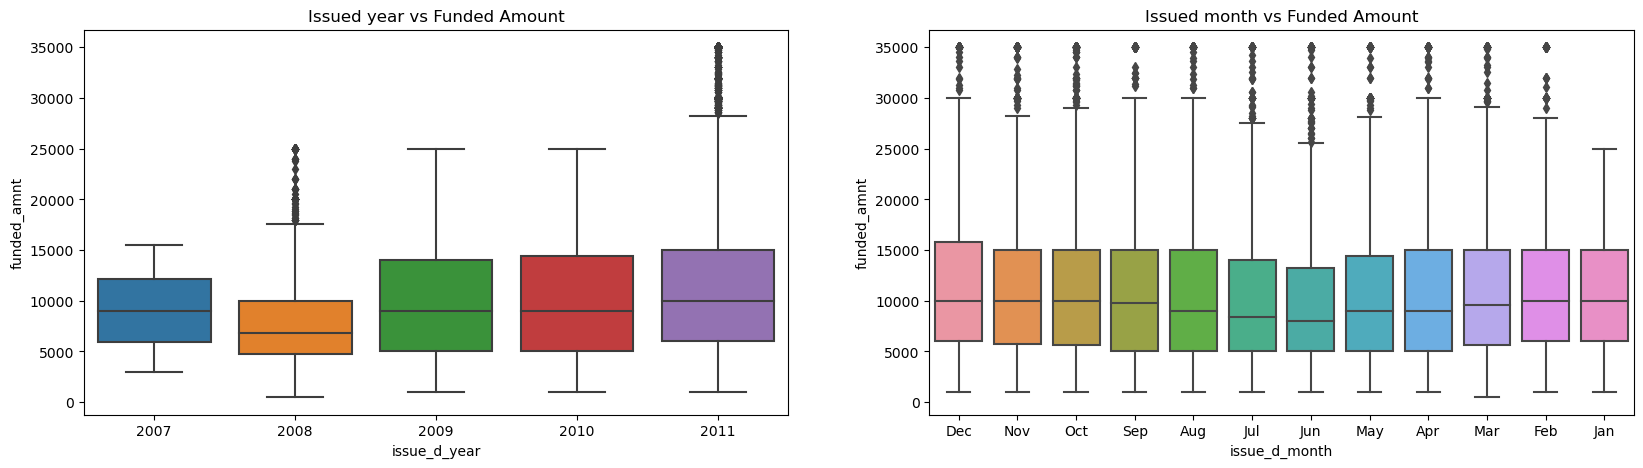

In [89]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

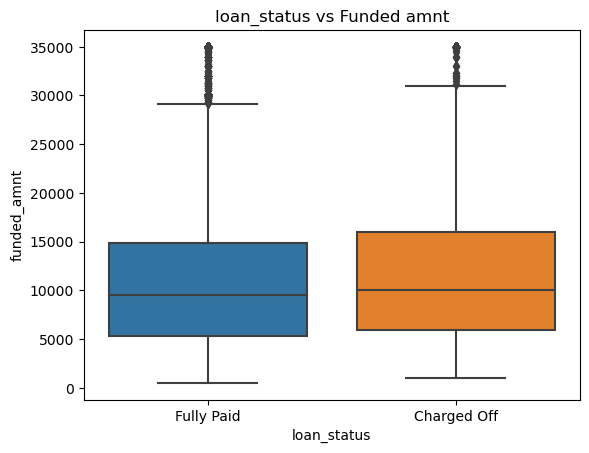

In [91]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')
plt.show()

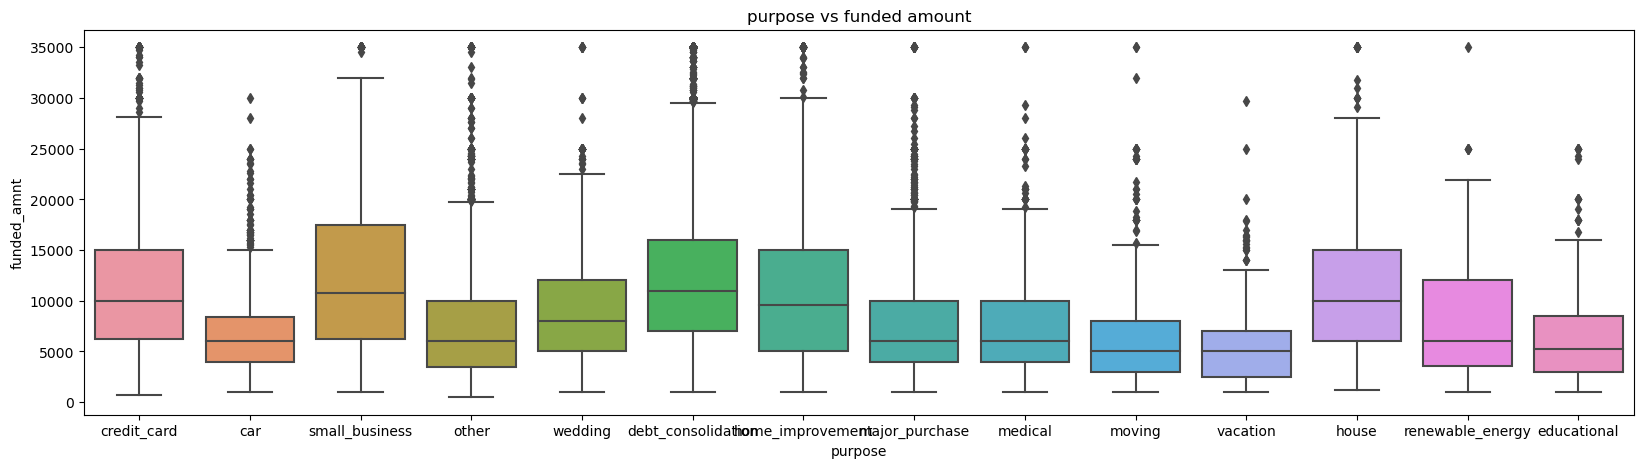

In [92]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')
plt.show()

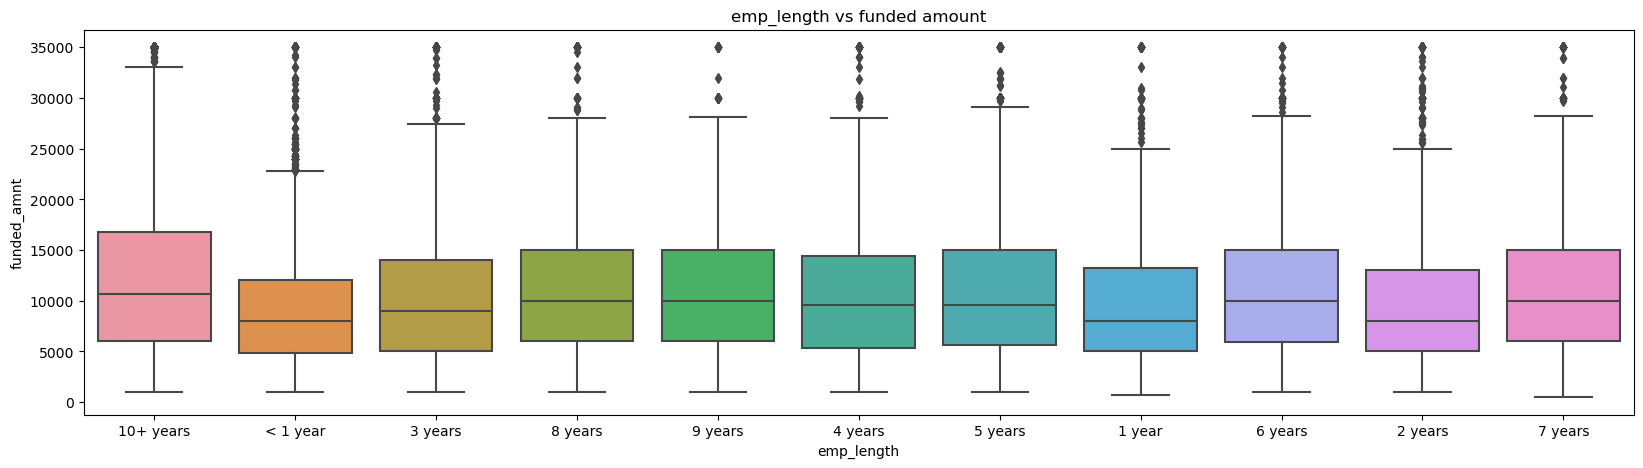

In [93]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')
plt.show()

### Observations:
#### The Funded Amount has similar observations as Loan Amount.

### Annual Income

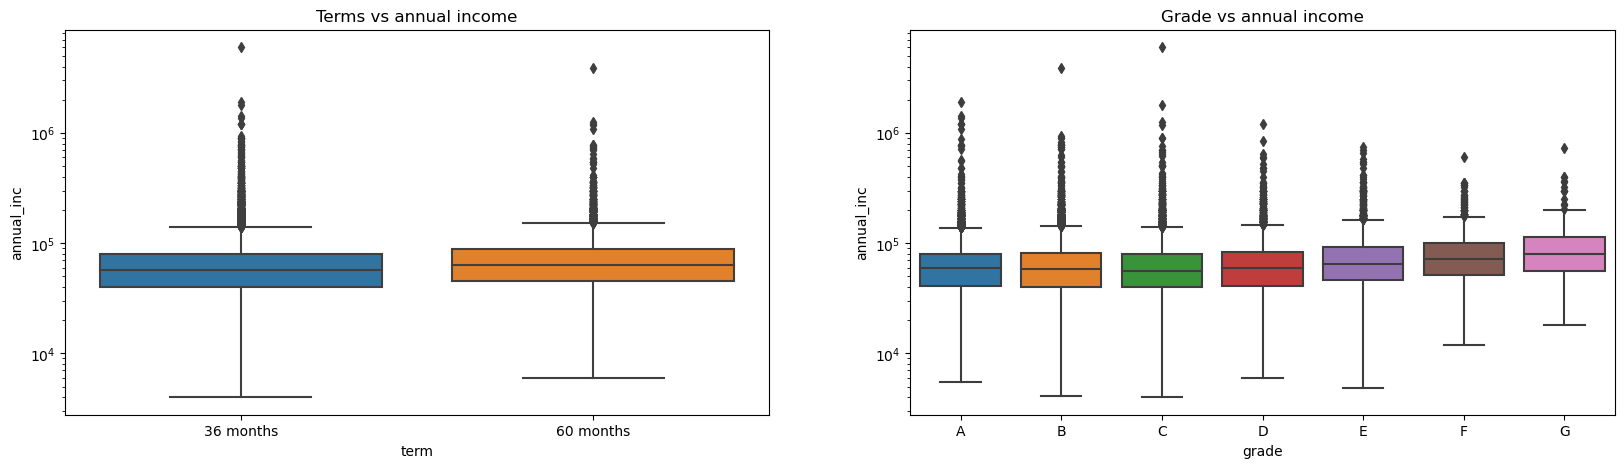

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')
plt.show()

### Observations:
#### Comparatively Annual income is higher for lower grades.

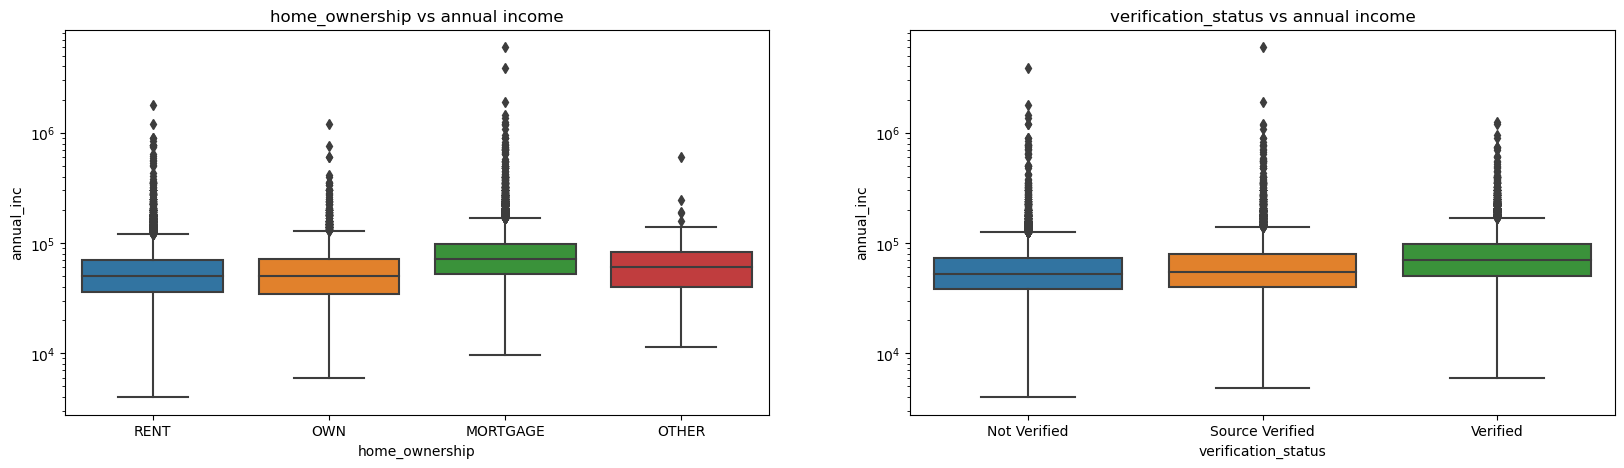

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')
plt.show()

### Observations: 
#### Borrowers who own homes with mortgages typically have higher incomes. Also, the income of most borrowers with higher annual earnings has been verified.

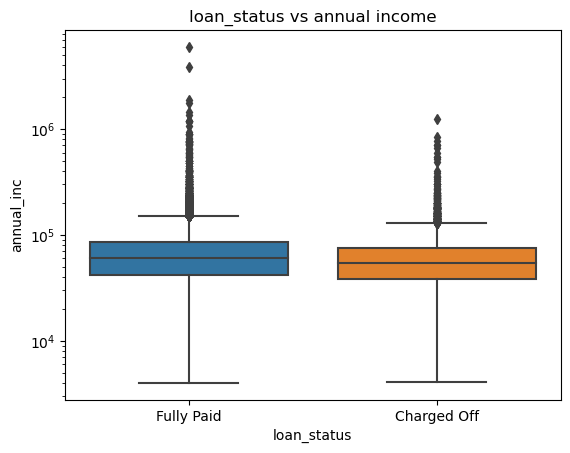

In [96]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')
plt.show()

### Observations: 
#### Most borrowers with higher annual incomes have loans that are marked as "Fully Paid."

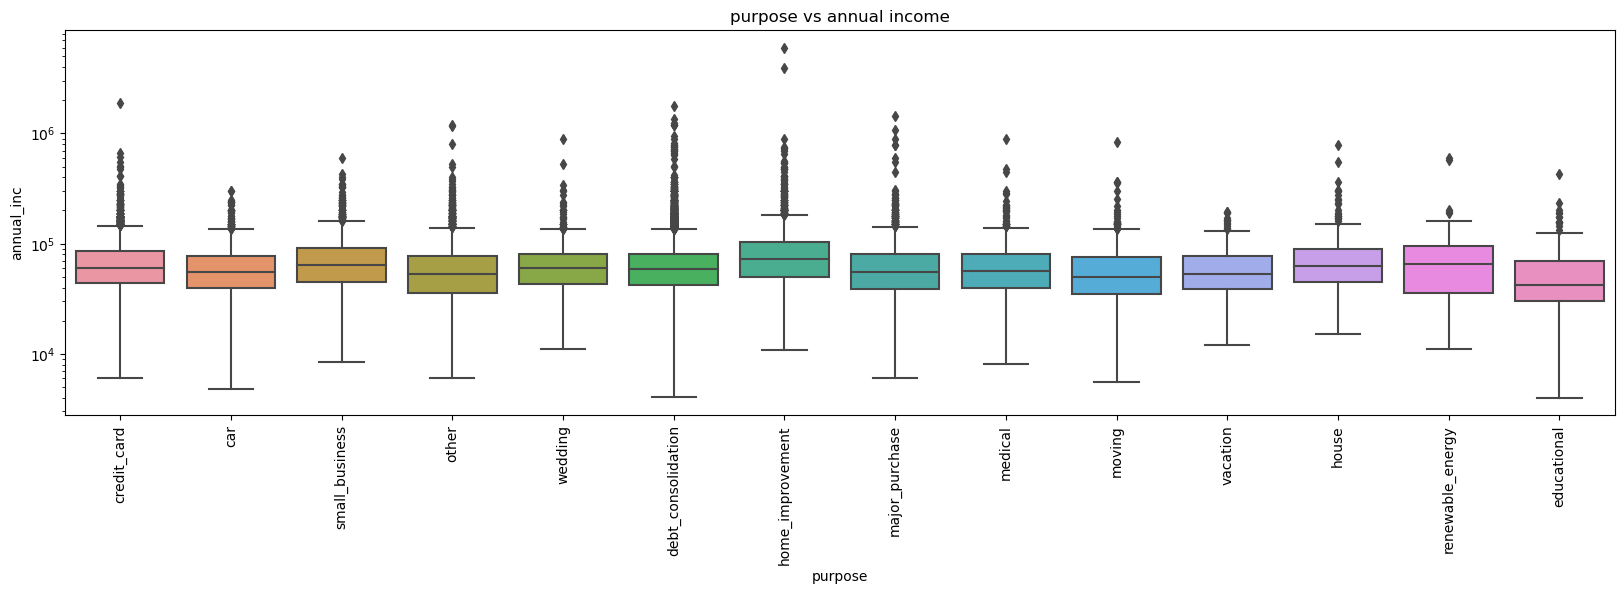

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')
plt.show()

### Observations:
#### Categories such as Renewable Energy, Small Business, and Home Improvements have borrowers who typically request loans with higher annual incomes.

### Public records

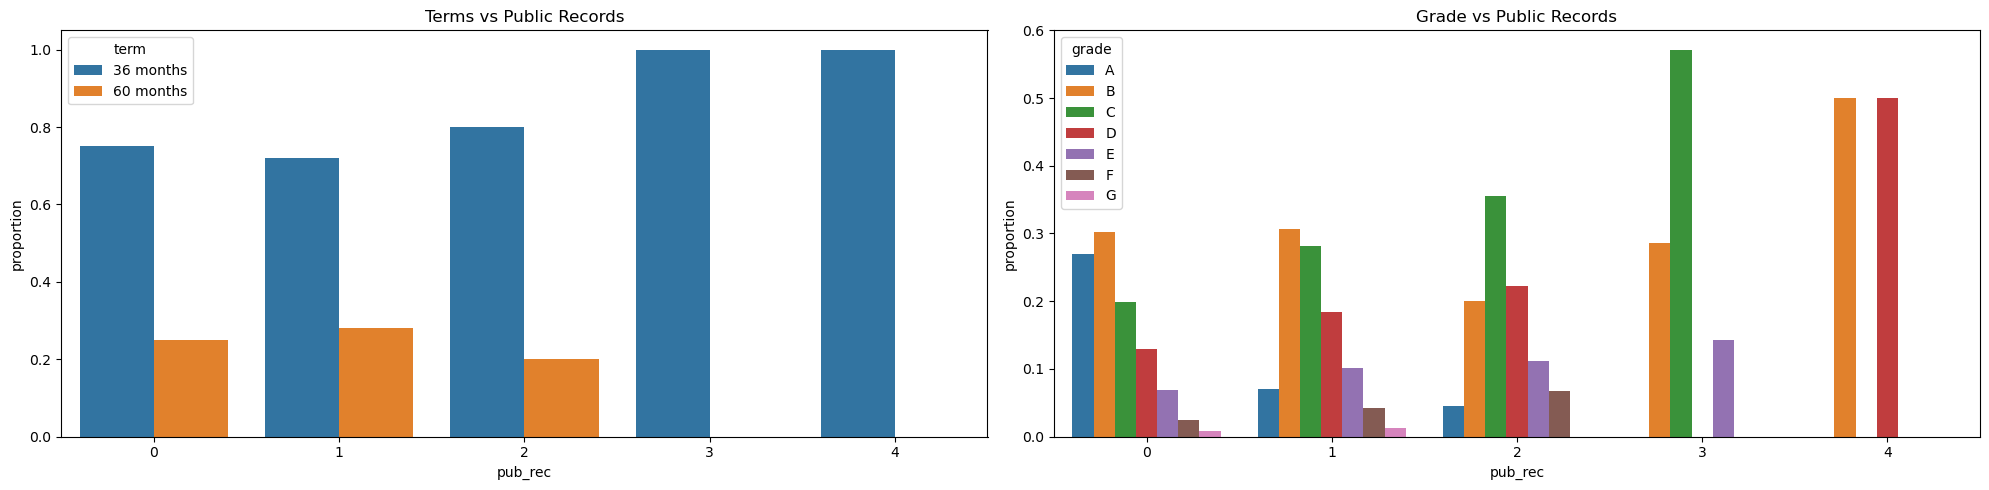

In [98]:
# Calculate proportions for term
df_term = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df_term.columns = ['pub_rec', 'term', 'count']
df_term['count'] = pd.to_numeric(df_term['count'], errors='coerce')
df_term['proportion'] = df_term.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

# Calculate proportions for grade
df_grade = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df_grade.columns = ['pub_rec', 'grade', 'count']
df_grade['count'] = pd.to_numeric(df_grade['count'], errors='coerce')
df_grade['proportion'] = df_grade.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(20, 5))

# Plotting for Term
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df_term)
plt.title('Terms vs Public Records')

# Plotting for Grade
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df_grade, hue_order=sorted(data['grade'].unique()))
plt.title('Grade vs Public Records')

plt.tight_layout()
plt.show()

### Observations:

#### -Borrowers with more public derogatory records often choose 36-month loans, while those with fewer records are more evenly split between 36-month and 60-month loans (80% and 20%).
#### -A-grade borrowers generally have fewer derogatory records compared to other grades.
#### -Borrowers with C, D, and E grades tend to have more public derogatory records.

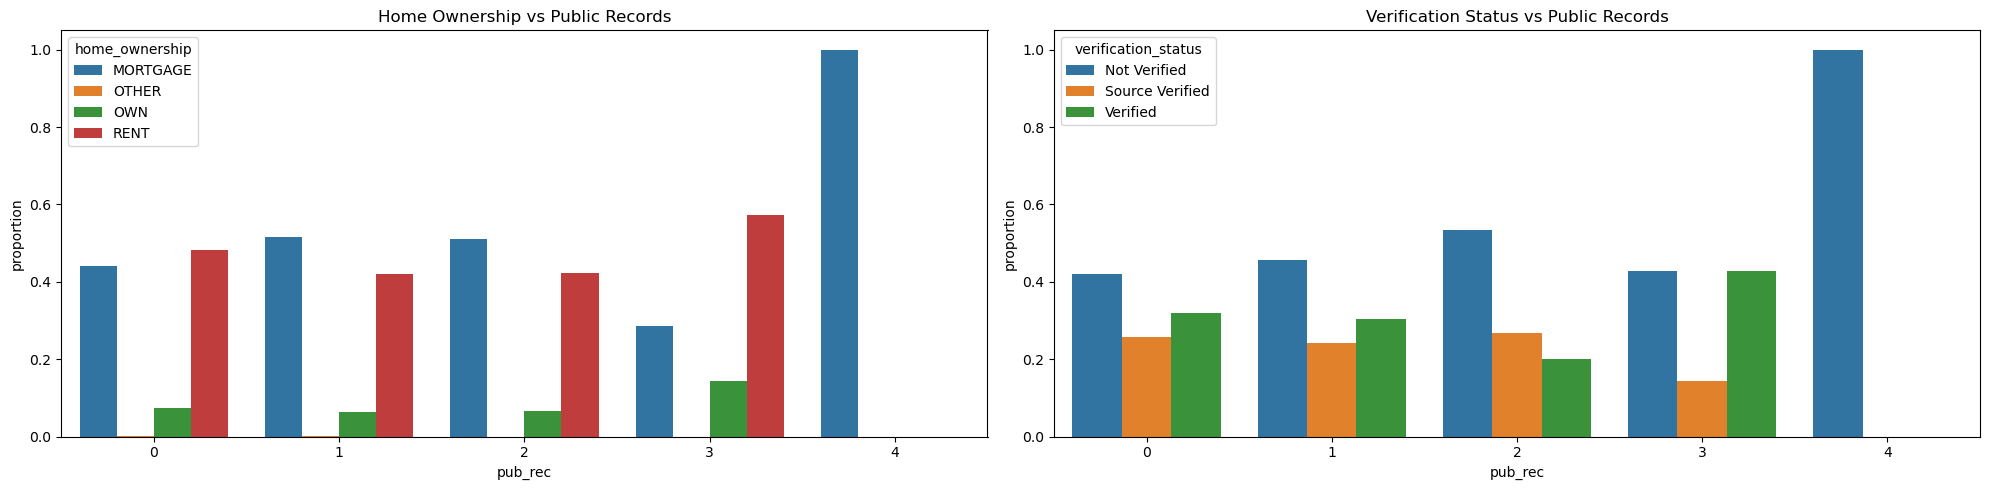

In [99]:
# Calculate proportions for home ownership
df_home_ownership = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df_home_ownership.columns = ['pub_rec', 'home_ownership', 'count']
df_home_ownership['count'] = pd.to_numeric(df_home_ownership['count'], errors='coerce')
df_home_ownership['proportion'] = df_home_ownership.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

# Calculate proportions for verification status
df_verification_status = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df_verification_status.columns = ['pub_rec', 'verification_status', 'count']
df_verification_status['count'] = pd.to_numeric(df_verification_status['count'], errors='coerce')
df_verification_status['proportion'] = df_verification_status.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(20,5))

# Plotting for Home Ownership
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df_home_ownership)
plt.title('Home Ownership vs Public Records')

# Plotting for Verification Status
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df_verification_status)
plt.title('Verification Status vs Public Records')

plt.tight_layout()
plt.show()

### Observations:
#### Borrowers with 4 public derogatory records are predominantly found in the mortgage-owned house category and among those with a "Not Verified" verification status.

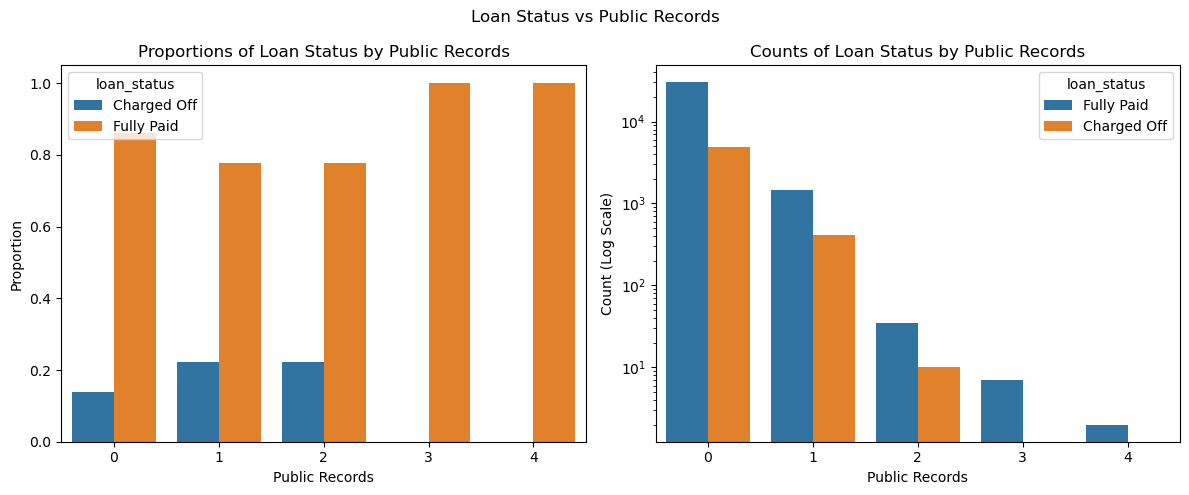

In [100]:
# Calculate proportions for loan status
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df.columns = ['pub_rec', 'loan_status', 'count']
df['count'] = pd.to_numeric(df['count'], errors='coerce')
df['proportion'] = df.groupby('pub_rec')['count'].transform(lambda x: x / x.sum())

plt.figure(figsize=(12,5))

# Plotting proportions
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)
plt.title('Proportions of Loan Status by Public Records')
plt.xlabel('Public Records')
plt.ylabel('Proportion')

# Plotting counts with a log scale
plt.subplot(122)
sns.countplot(x='pub_rec', hue='loan_status', data=data)
plt.yscale('log')
plt.title('Counts of Loan Status by Public Records')
plt.xlabel('Public Records')
plt.ylabel('Count (Log Scale)')

plt.suptitle('Loan Status vs Public Records')
plt.tight_layout()
plt.show()

### Observations:
#### There is an increase in defaulted loans for borrowers with public derogatory records ranging from 0 to 2. However, this trend does not apply to borrowers with 3 or 4 derogatory records, likely because there are very few individuals in those categories. The majority of borrowers fall into the 0 public derogatory record category, which skews the overall analysis.

## Bivariate Analysis

In [73]:
### Term vs Loan Status
# Calculate proportions for each category
term_loan_status_counts = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
term_loan_status_counts.columns = ['term', 'loan_status', 'count']

In [74]:
# Convert 'count' to numeric if needed
term_loan_status_counts['count'] = pd.to_numeric(term_loan_status_counts['count'], errors='coerce')

In [75]:
# Calculate proportions
term_loan_status_counts['proportion'] = term_loan_status_counts.groupby('term')['count'].transform(lambda x: x / x.sum())

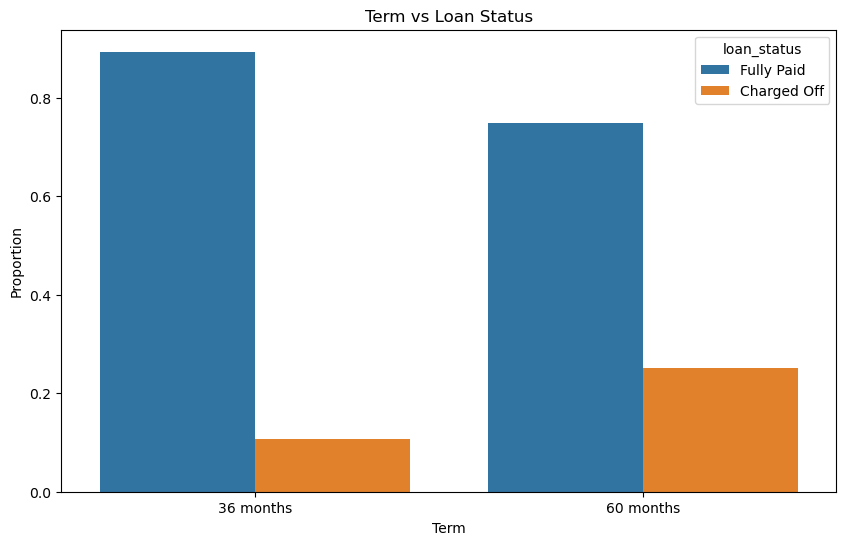

In [76]:
# Plotting proportions of loan status by term
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='proportion', hue='loan_status', data=term_loan_status_counts, hue_order=['Fully Paid', 'Charged Off'])
plt.title('Term vs Loan Status')
plt.ylabel('Proportion')
plt.xlabel('Term')
plt.show()

### Observations:
#### - Higher proportion of defaults for 60-month term compared to 36-month term.
#### - Fully paid loans are higher for the 36-month term.

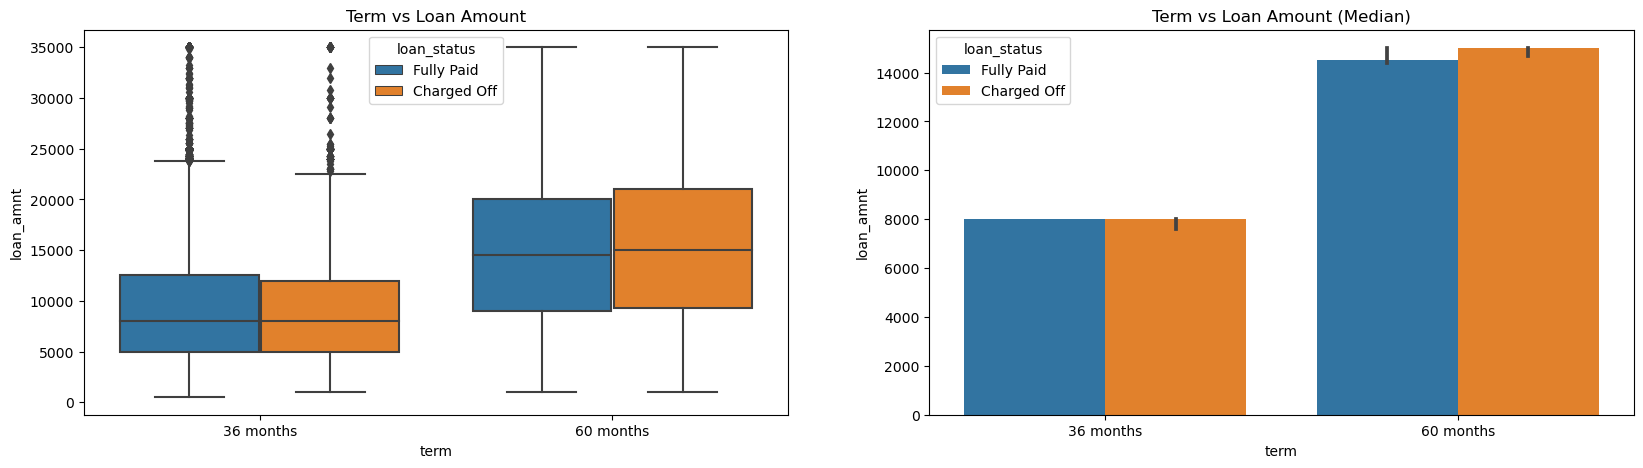

In [53]:
# Loan Amount vs Term
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs Loan Amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Loan Amount (Median)')
plt.show()

### Observations:
#### - Loan amount does not significantly influence defaults for either term.
#### - Borrowers are evenly distributed between default and non-default statuses across both tenures.

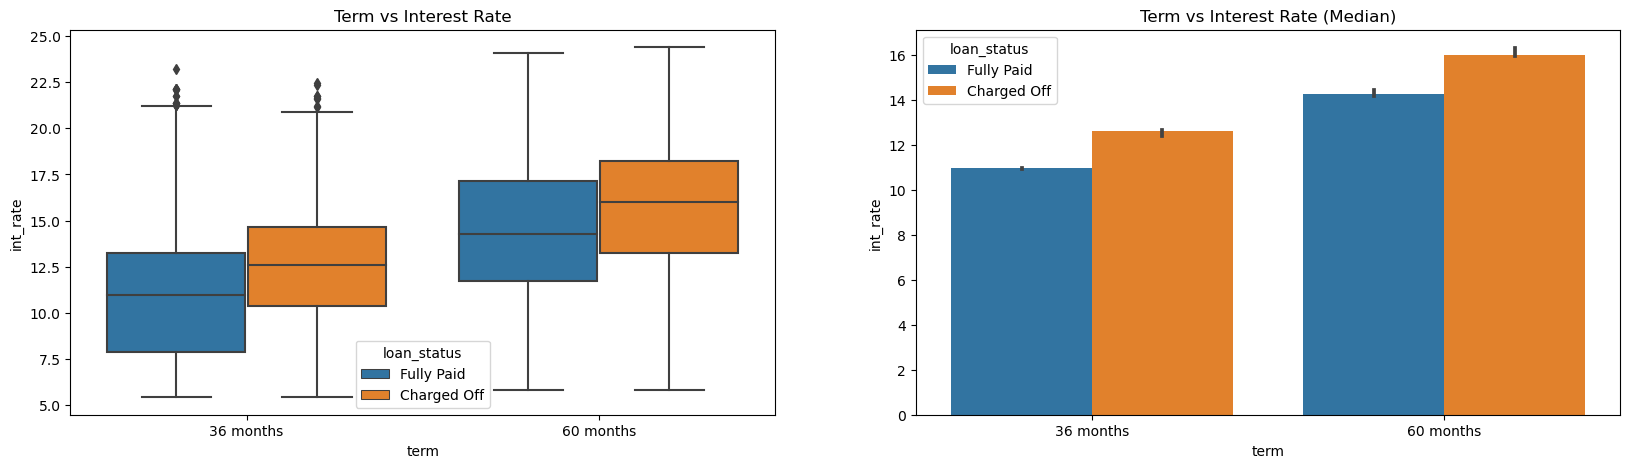

In [54]:
# Interest Rate vs Term
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest Rate (Median)')
plt.show()

### Observations:
#### Higher interest rates are associated with higher default rates for both tenures.

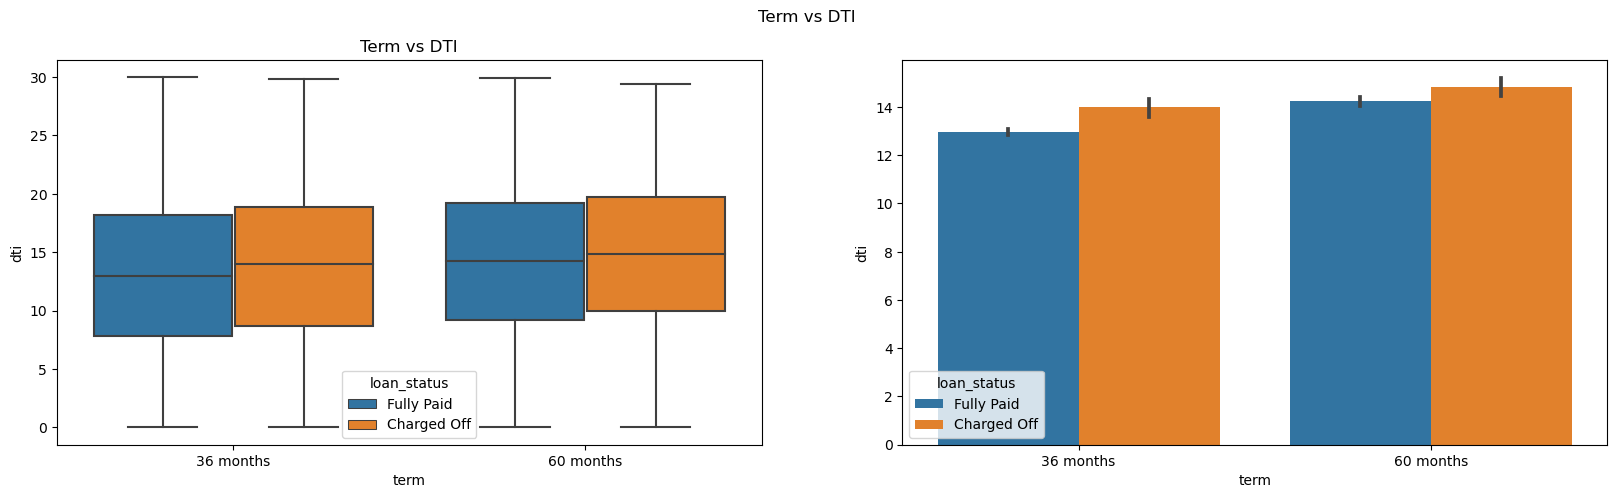

In [55]:
# DTI vs Term
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.title('Term vs DTI')
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

### Observations:
#### Charge-offs are higher than fully-paid loans when considering the debt-to-income ratio.

In [56]:
### Grade vs Loan Status
# Sorting Grades from A to G
grade_ord = sorted(data.grade.unique())

In [57]:
# Group by 'grade' and 'loan_status' and count occurrences
grade_loan_status_counts = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
grade_loan_status_counts.columns = ['grade', 'loan_status', 'count']

In [58]:
# Calculate proportions
grade_loan_status_counts['percentage'] = grade_loan_status_counts.groupby('grade')['count'].transform(lambda x: x / x.sum())

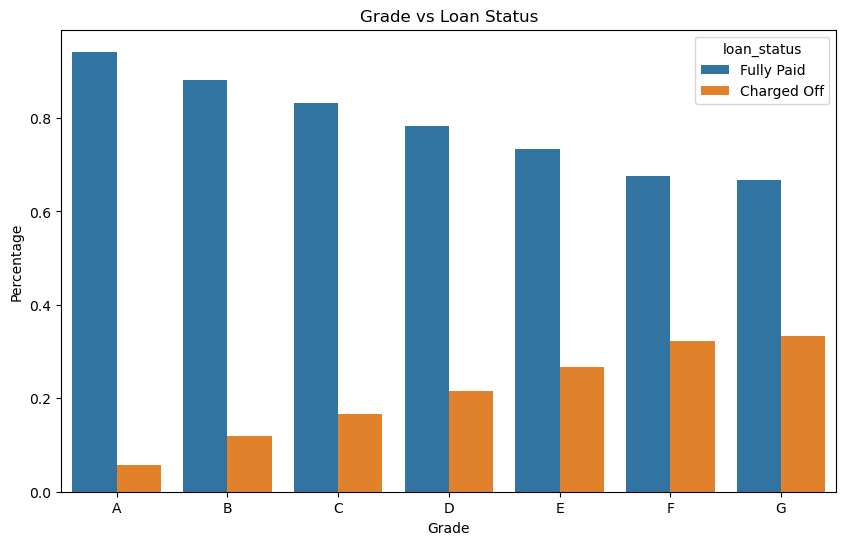

In [59]:
# Plotting proportions of loan status by grade
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=grade_loan_status_counts, hue_order=['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan Status')
plt.ylabel('Percentage')
plt.xlabel('Grade')
plt.show()

### Observations:
#### Number of charged-off loans increases as credit grades decrease.

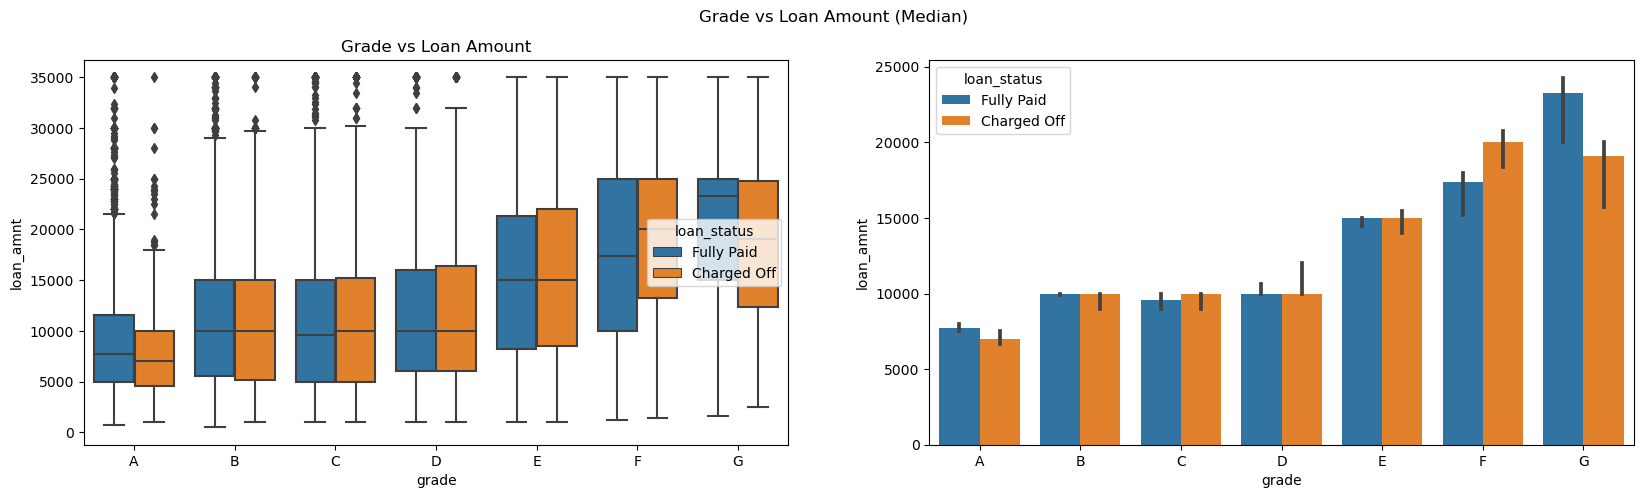

In [60]:
# Loan Amount vs Grade
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order=grade_ord)
plt.title('Grade vs Loan Amount')
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order=grade_ord)
plt.suptitle('Grade vs Loan Amount (Median)')
plt.show()

### Observations:
#### - Significant difference in charged-off loans between lower grades.
#### - Borrowers with lower grades tend to take out higher loan amounts and are more prone to default.

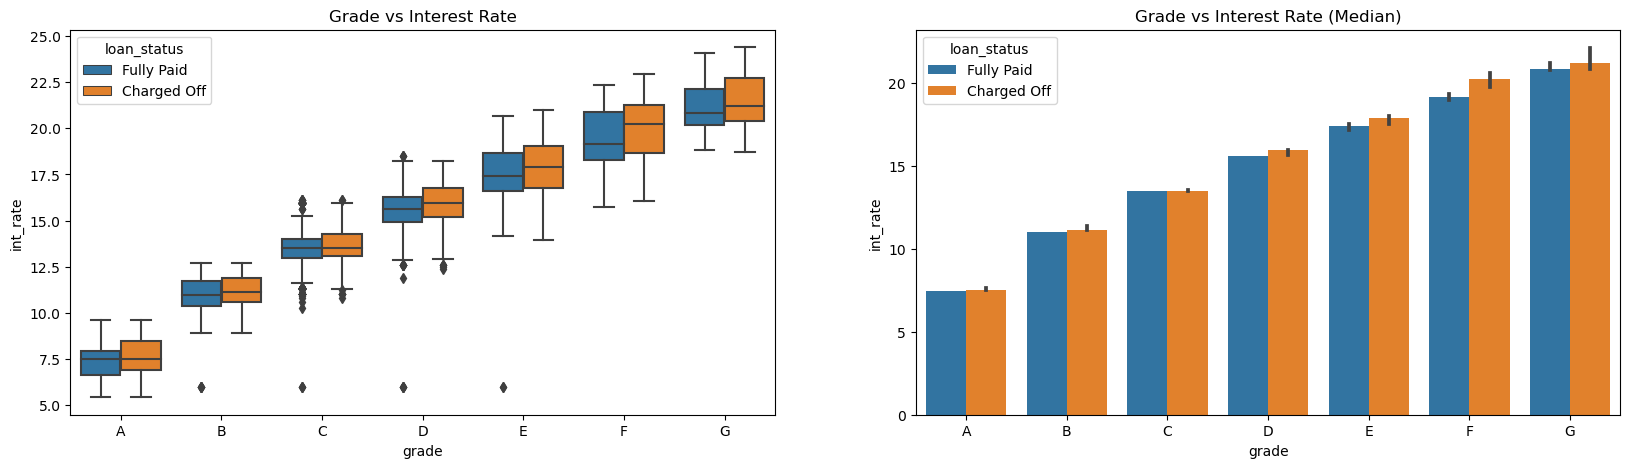

In [61]:
# Interest Rate vs Grade
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order=grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order=grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate (Median)')
plt.show()

### Observations:
#### Lower grades are associated with higher interest rates and a higher likelihood of defaulting.

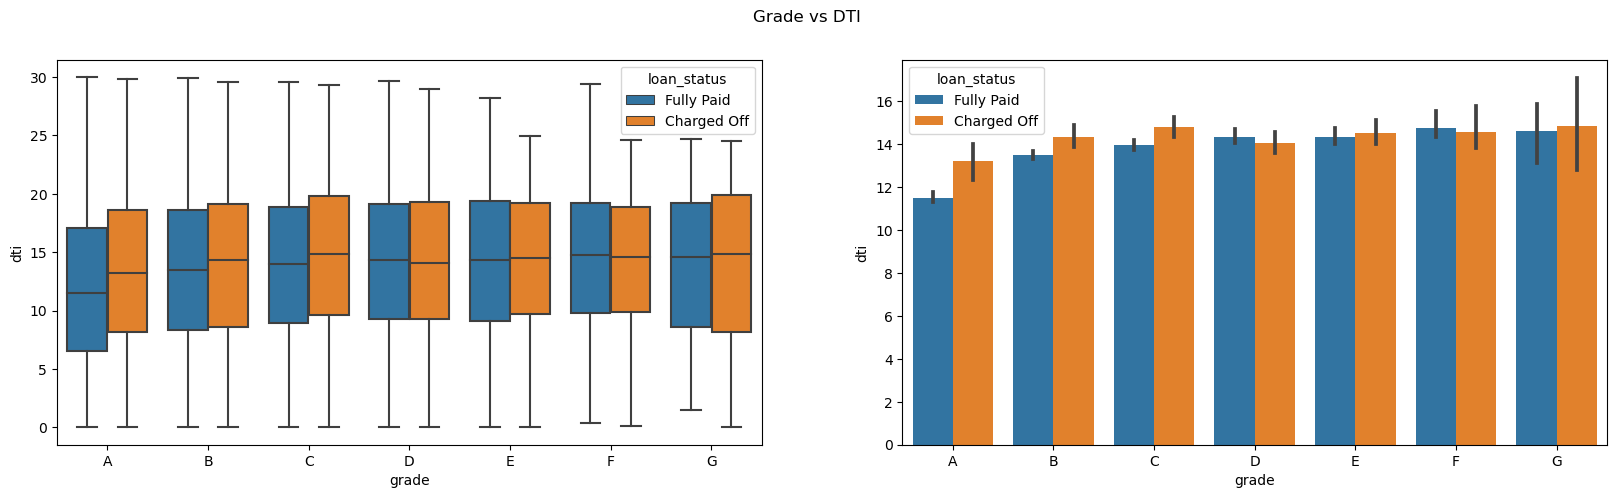

In [62]:
# DTI vs Grade
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order=grade_ord)
plt.suptitle('Grade vs DTI')
plt.show()

### Observations:
#### Little variation in DTI ratio across different grades and loan statuses.

In [63]:
### Employment Length vs Loan Status
# Group by 'emp_length' and 'loan_status' and count occurrences
emp_length_loan_status_counts = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
emp_length_loan_status_counts.columns = ['emp_length', 'loan_status', 'count']

In [64]:
# Calculate proportions
emp_length_loan_status_counts['percentage'] = emp_length_loan_status_counts.groupby('emp_length')['count'].transform(lambda x: x / x.sum())

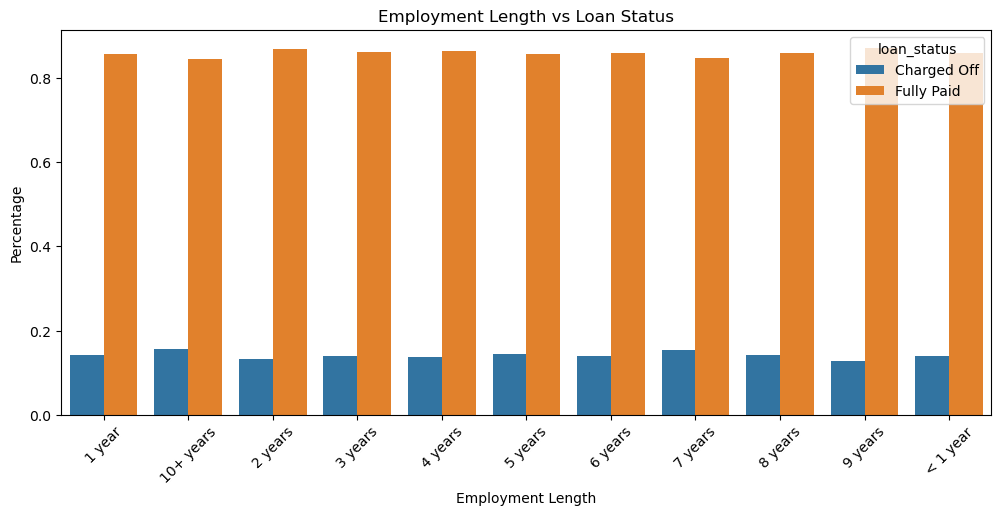

In [65]:
# Plotting proportions of loan status by employment length
plt.figure(figsize=(12, 5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=emp_length_loan_status_counts)
plt.title('Employment Length vs Loan Status')
plt.ylabel('Percentage')
plt.xlabel('Employment Length')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Observations:
#### No significant changes or patterns in default rates across different employment lengths.

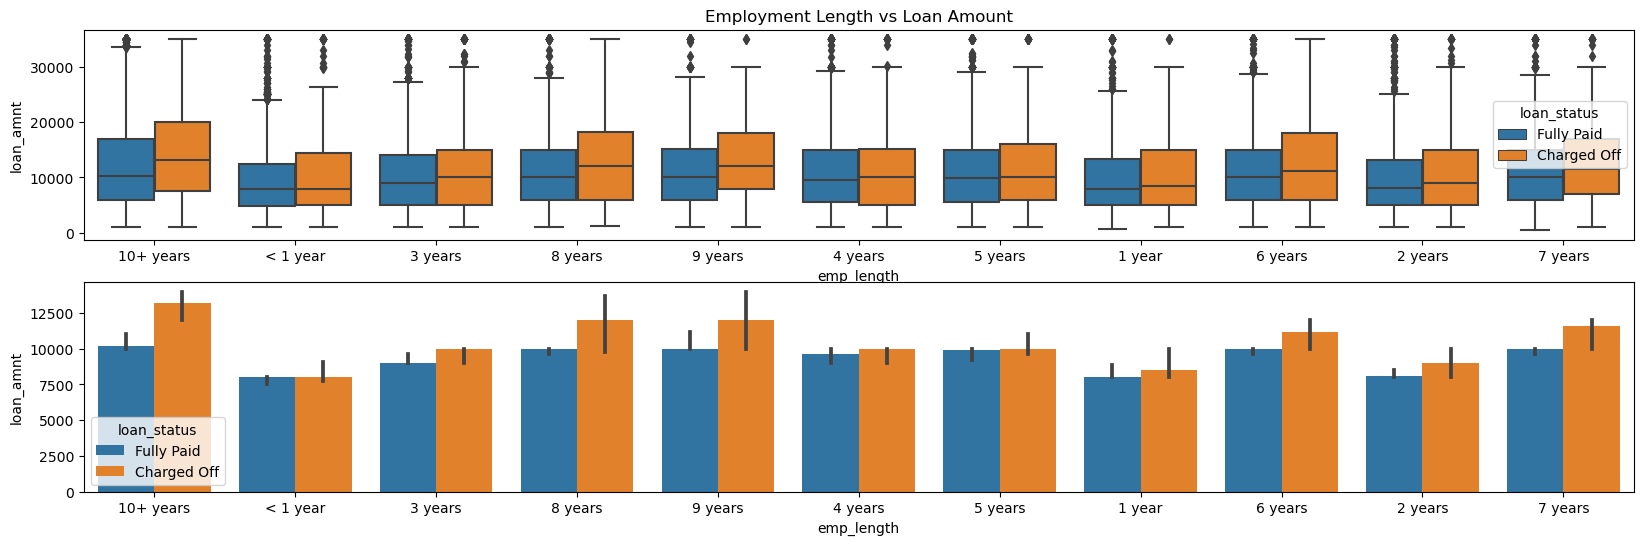

In [66]:
# Loan Amount vs Employment Length
plt.figure(figsize=(20, 6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.title('Employment Length vs Loan Amount')
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

### Observations:
#### Borrowers with longer employment lengths who took out larger loan amounts tend to have higher default rates.

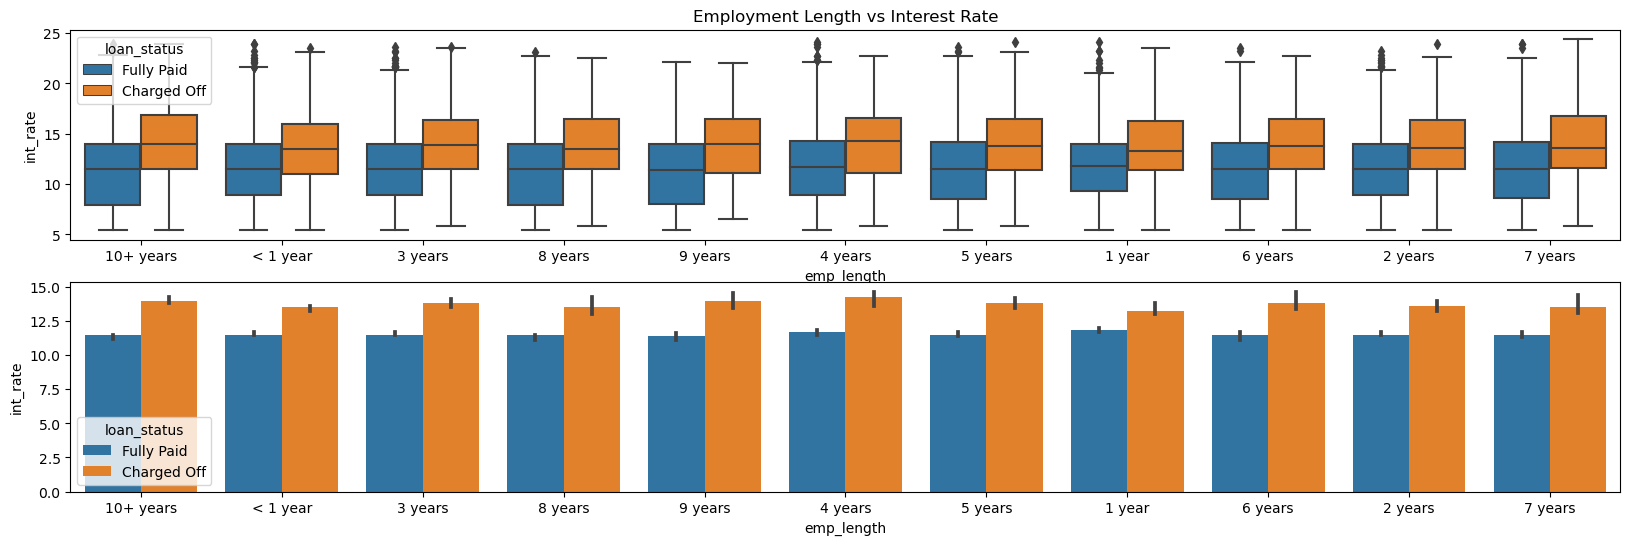

In [67]:
# Interest Rate vs Employment Length
plt.figure(figsize=(20, 6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.title('Employment Length vs Interest Rate')
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.show()

### Observations:
#### Regardless of employment length, loans with higher interest rates tend to have higher default rates.

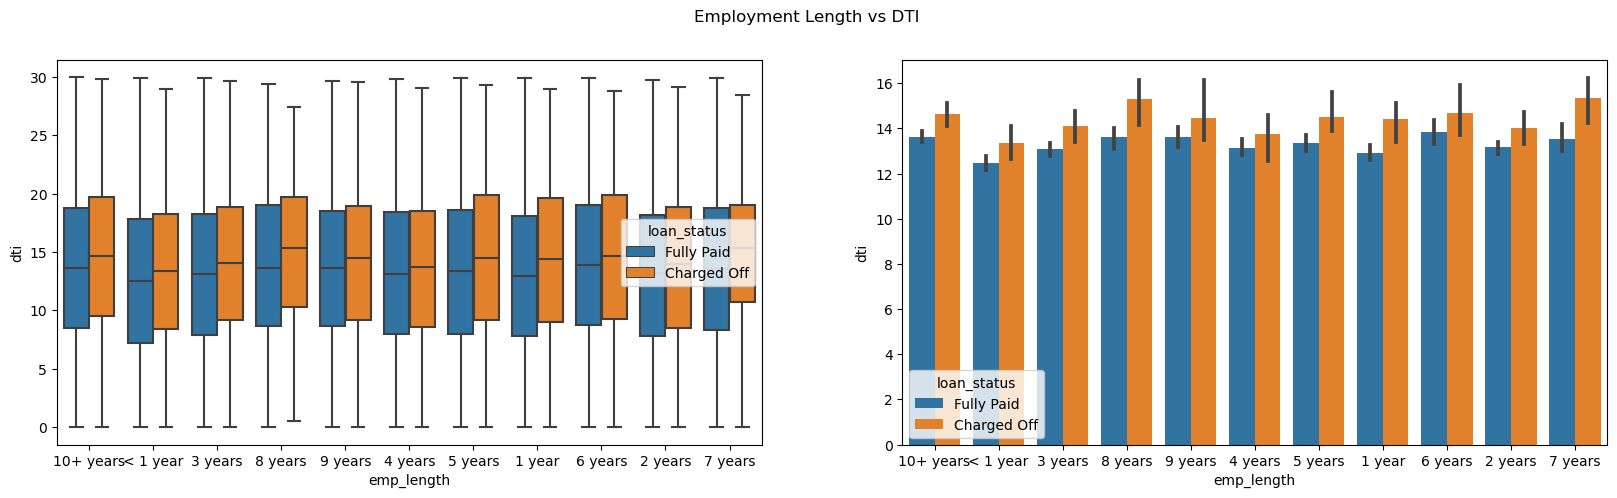

In [68]:
# DTI vs Employment Length
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Employment Length vs DTI')
plt.show()

### Observations:
#### Employment length and DTI do not show clear patterns or correlations with defaults.

In [69]:
### Home Ownership vs Loan Status
# Group by 'home_ownership' and 'loan_status' and count occurrences
home_ownership_loan_status_counts = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
home_ownership_loan_status_counts.columns = ['home_ownership', 'loan_status', 'count']

In [70]:
# Calculate proportions
home_ownership_loan_status_counts['percentage'] = home_ownership_loan_status_counts.groupby('home_ownership')['count'].transform(lambda x: x / x.sum())

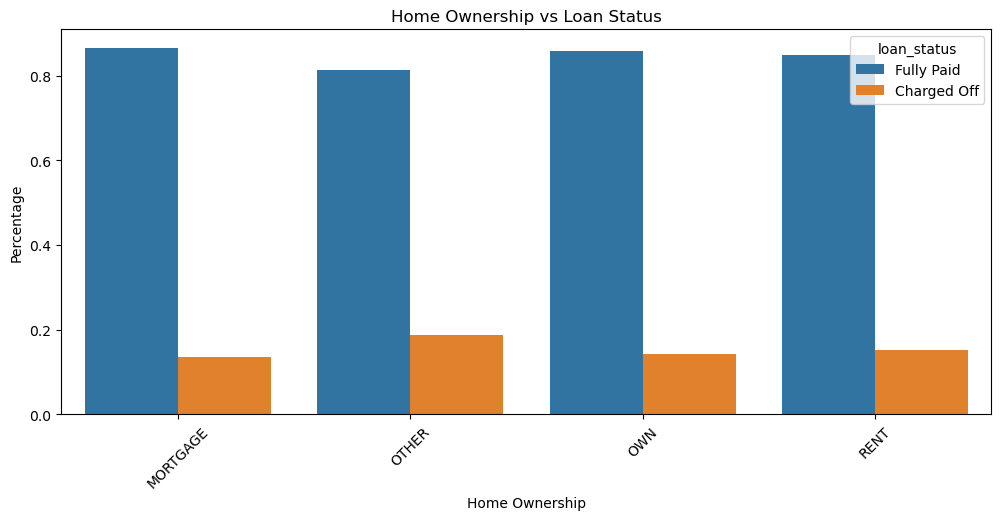

In [71]:
# Plotting proportions of loan status by home ownership
plt.figure(figsize=(12, 5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=home_ownership_loan_status_counts, hue_order=['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan Status')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Observations:
#### Slightly higher percentage of defaults in the "Other" home ownership category.

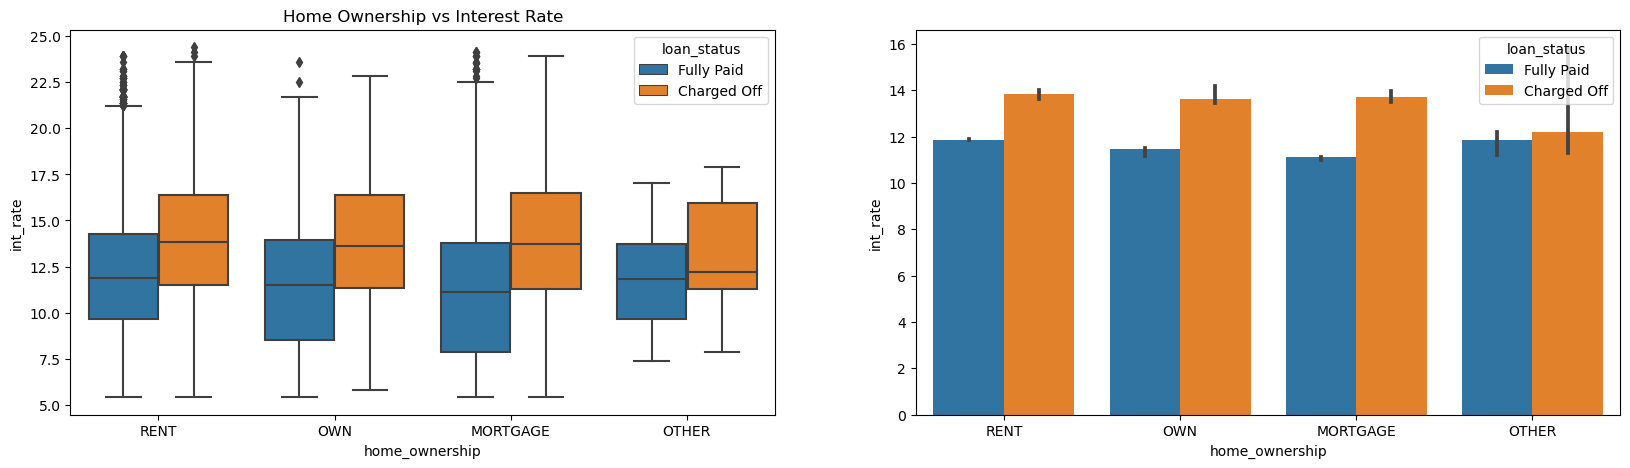

In [72]:
# Interest Rate vs Home Ownership
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)


plt.title('Home Ownership vs Interest Rate')
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.show()

### Observations:
#### No significant variation in interest rates across home ownership categories related to default rates.

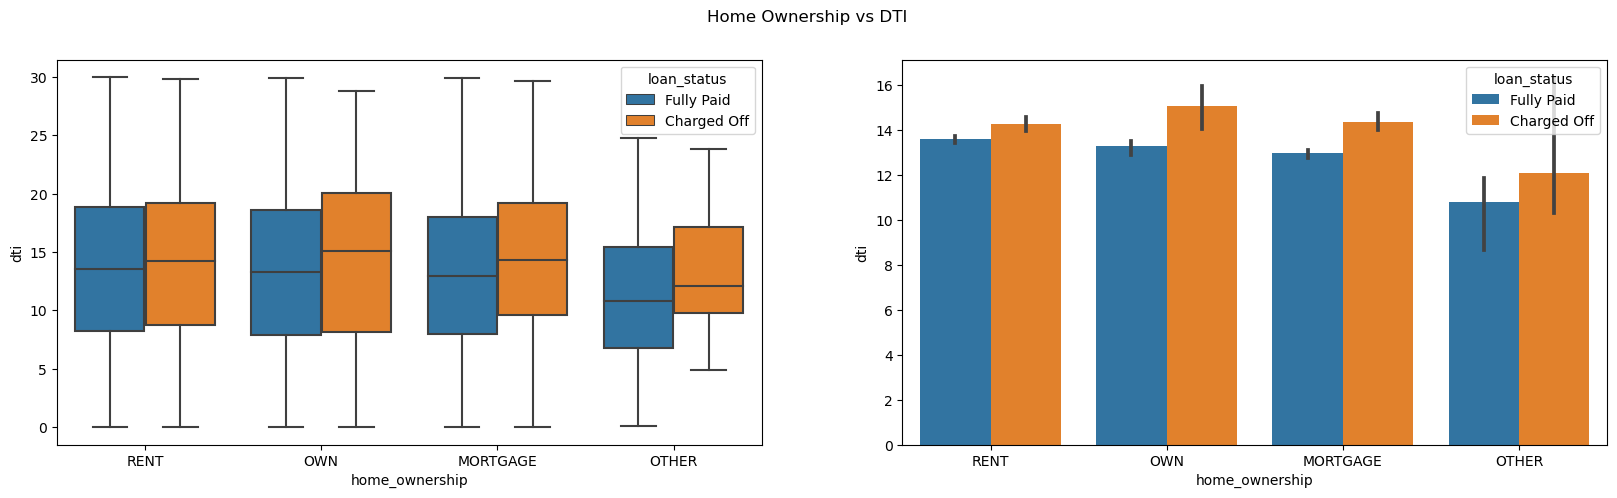

In [73]:
# DTI vs Home Ownership
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Home Ownership vs DTI')
plt.show()

### Observations:
#### DTI ratios are similar across different home ownership statuses with respect to loan defaults.